In [1]:
cd F:\PROJECTS\PROJECT_HUMAN FETAL COCHLEAE\WORKPLACE\R\

F:\PROJECTS\PROJECT_HUMAN FETAL COCHLEAE\WORKPLACE\R


G:\Miniconda3\envs\scvi-env\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
ls

 驱动器 F 中的卷是 data
 卷的序列号是 6436-68F1

 F:\PROJECTS\PROJECT_HUMAN FETAL COCHLEAE\WORKPLACE\R 的目录

2024/06/07  13:49    <DIR>          .
2024/06/07  13:49    <DIR>          ..
2024/02/18  10:45    <DIR>          .ipynb_checkpoints
2024/06/05  20:06            26,734 .Rhistory
2023/09/12  17:50         2,265,477 1067_TFS_mouse.pdf
2023/09/13  21:47           642,977 177_TFS_human.pdf
2023/10/05  19:49           671,645 200_TFS_conserved.pdf
2023/10/05  20:13        11,021,865 200_TFS_human.pdf
2023/09/12  17:27           534,016 244_TFS_mouse.pdf
2023/09/12  10:22           665,907 249_TFS_human.pdf
2023/09/11  21:42           772,039 366_TFS_mouse.pdf
2023/09/12  10:55         2,388,328 915_TFS_human.pdf
2023/09/13  21:52         3,510,253 988_TFS_human.pdf
2023/08/17  17:43        16,668,064 A SINGLE-NULEUS TRANSCRIPTOMIC ATLAS OF HUMAN FETAL COCHLEA.ipynb
2023/11/04  20:52        12,546,189 all_sgn_NEW.rds
2023/09/11  21:22            11,690 allTFs_hg38.txt
2024/06/05  14:16            3

In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys
import scipy

In [4]:
def Barplot(which_var, adata, var='clusters', height=3, color = False):
    plotdata = pd.crosstab(adata.obs[var], adata.obs[which_var], normalize='index') * 100
    if 'category' in plotdata.index.dtype.name:
        plotdata.index.reorder_categories(adata.obs[var].cat.categories[::-1])

    if not color:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False)
    else:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False, color = color)
    ax1.set_title(which_var+' %')
    ax1.set_ylabel(var)
    horiz_offset = 1
    vert_offset = 1.
    ax1 = ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset))
#     ax1.figure.savefig(str(sc.settings.figdir)+'/barplot_'+var+'_proportions_'+which_var+'.pdf', bbox_inches='tight',
#                        dpi=300, orientation='landscape', format= 'pdf', optimize=True)

In [5]:
palette = ["#E31A1C", "#1F78B4", "#A6CEE3",  "#B2DF8A", "#33A02C", "#FB9A99",  "#FDBF6F", "#FF7F00", "#CAB2D6", "#6A3D9A", "#FFFF99", "#B15928", "#66C2A5",
               "#FC8D62", "#8DA0CB", "#B3B3B3", "#A6D854", "#FFD92F", "#E5C494", "#E78AC3"]

In [7]:
adata_mouse=sc.read('Mu_cochlea_python.h5ad')

G:\Miniconda3\envs\scvi-env\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [8]:
adata_human=sc.read('Hu_cochlea_python.h5ad')

G:\Miniconda3\envs\scvi-env\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [73]:
adata2=sc.read("scRNA_P8P12P20.h5ad")

G:\Miniconda3\envs\scvi-env\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [9]:
adata_mouse

AnnData object with n_obs × n_vars = 15660 × 14530
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'subclasses'
    var: 'name'
    obsm: 'X_pca', 'X_umap'

In [10]:
adata_human

AnnData object with n_obs × n_vars = 38446 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pHB', 'pRP', 'pMT', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'subclasses'
    var: 'name'
    obsm: 'X_pca', 'X_umap'

In [74]:
adata2

AnnData object with n_obs × n_vars = 88006 × 39970
    obs: 'cell_type', 'age', 'louvain'
    var: 'gene_symbol'

In [75]:
sc.pp.normalize_total(adata2)
sc.pp.log1p(adata2)
sc.tl.pca(adata2)
sc.pp.neighbors(adata2,n_neighbors=50,n_pcs=30,metric="cosine")
sc.tl.umap(adata2)
sc.tl.leiden(adata2)

In [79]:
adata2

AnnData object with n_obs × n_vars = 88006 × 39970
    obs: 'cell_type', 'age', 'louvain', 'leiden'
    var: 'gene_symbol'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

G:\Miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


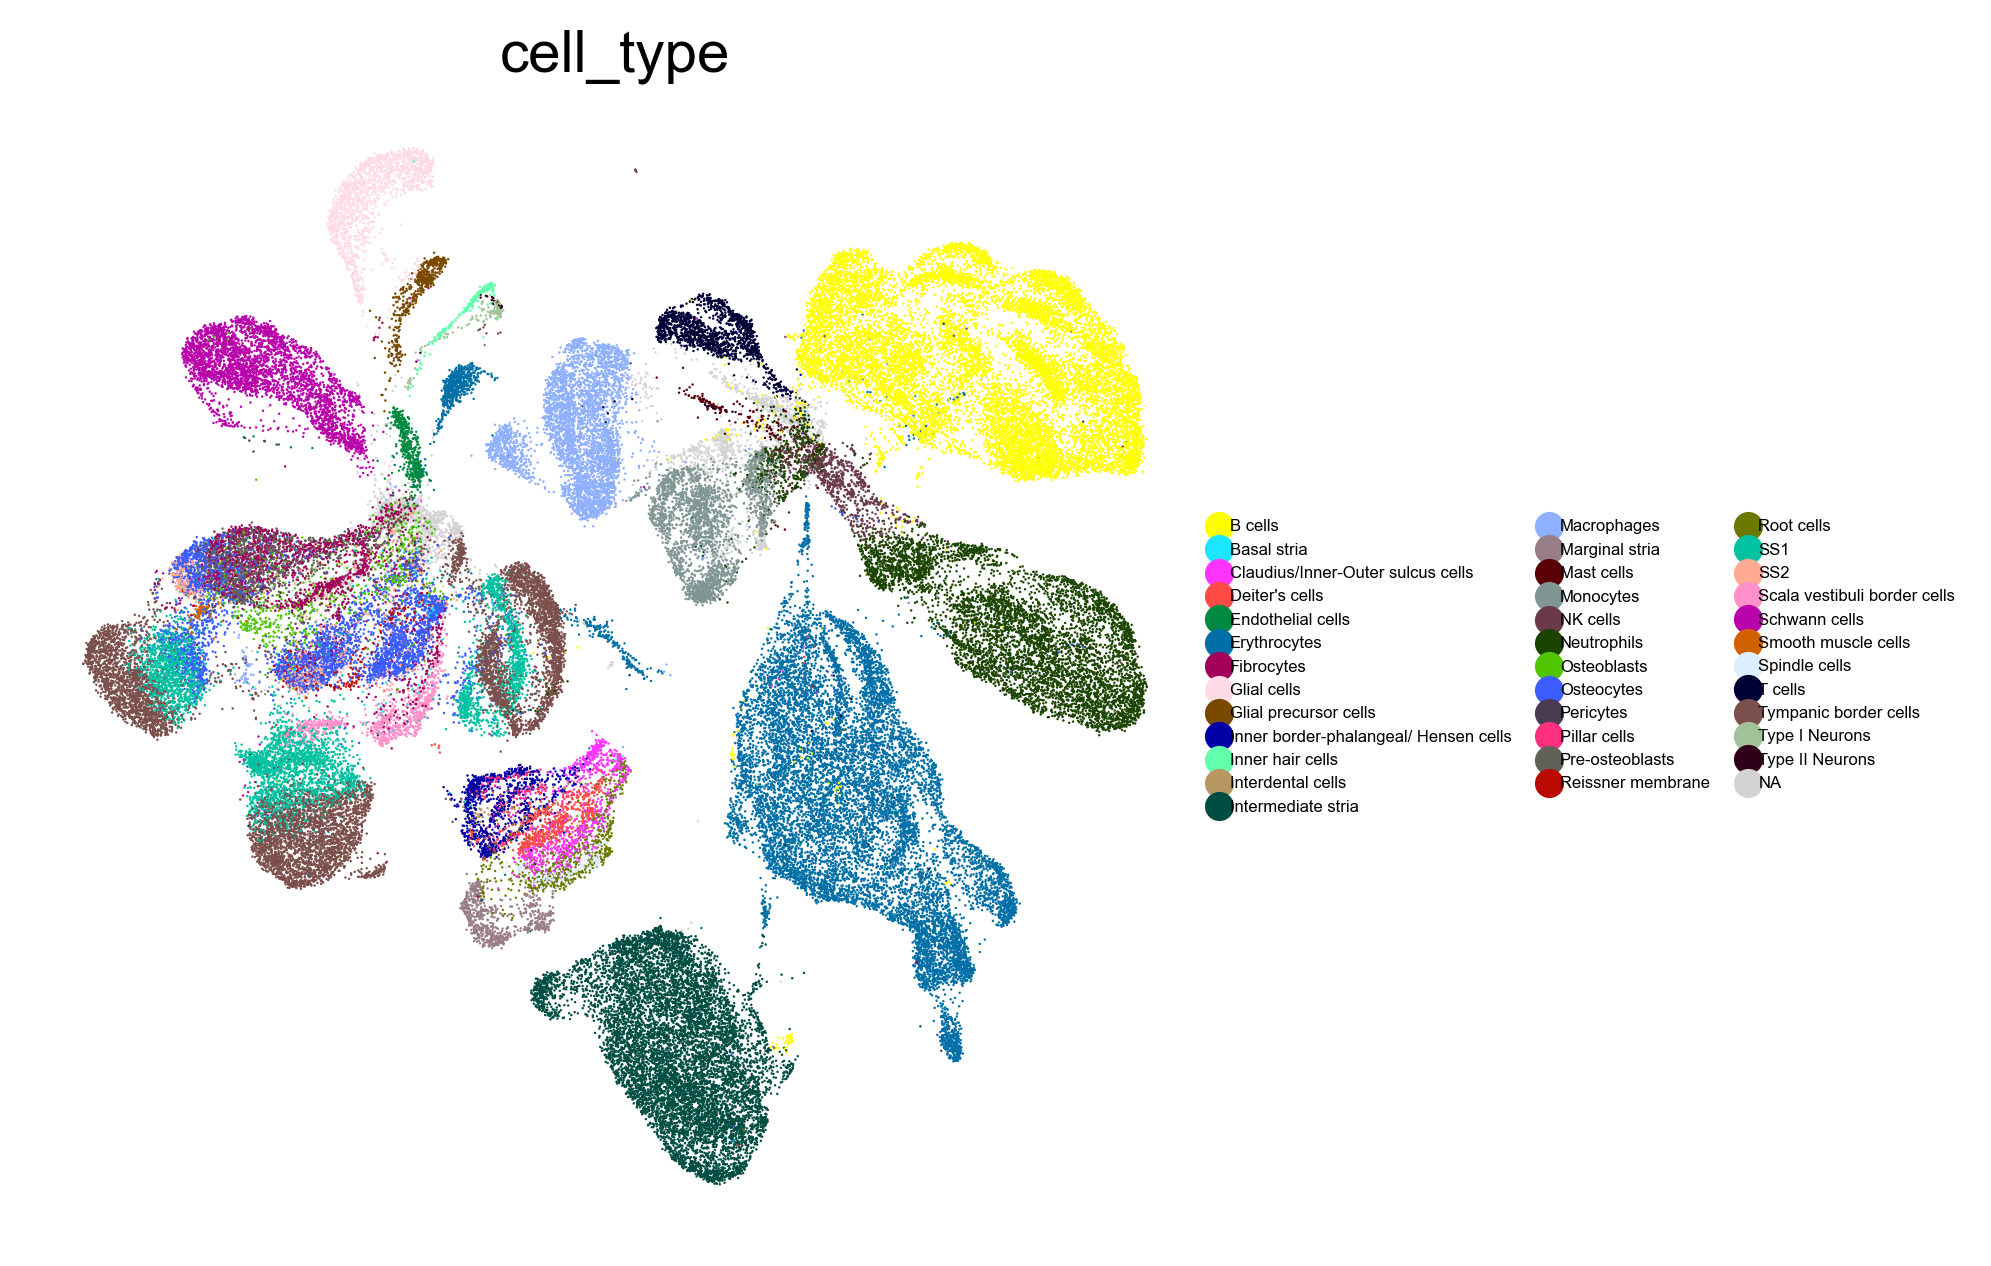

In [78]:
sc.set_figure_params(figsize=(5,5),frameon=False,dpi=150,dpi_save=600)
sc.pl.umap(adata2,color=["cell_type"],frameon=False, legend_fontsize=4)#legend_loc="on data",

G:\Miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


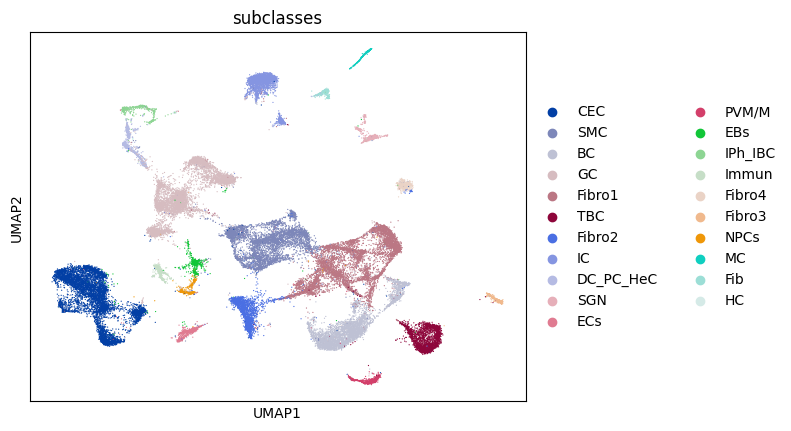

In [12]:
sc.pl.umap(adata_human,color="subclasses")

G:\Miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


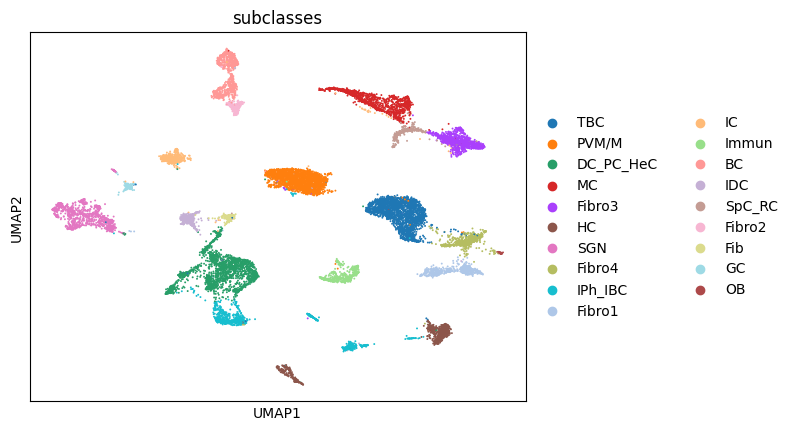

In [13]:
sc.pl.umap(adata_mouse,color="subclasses")

G:\Miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
G:\Miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


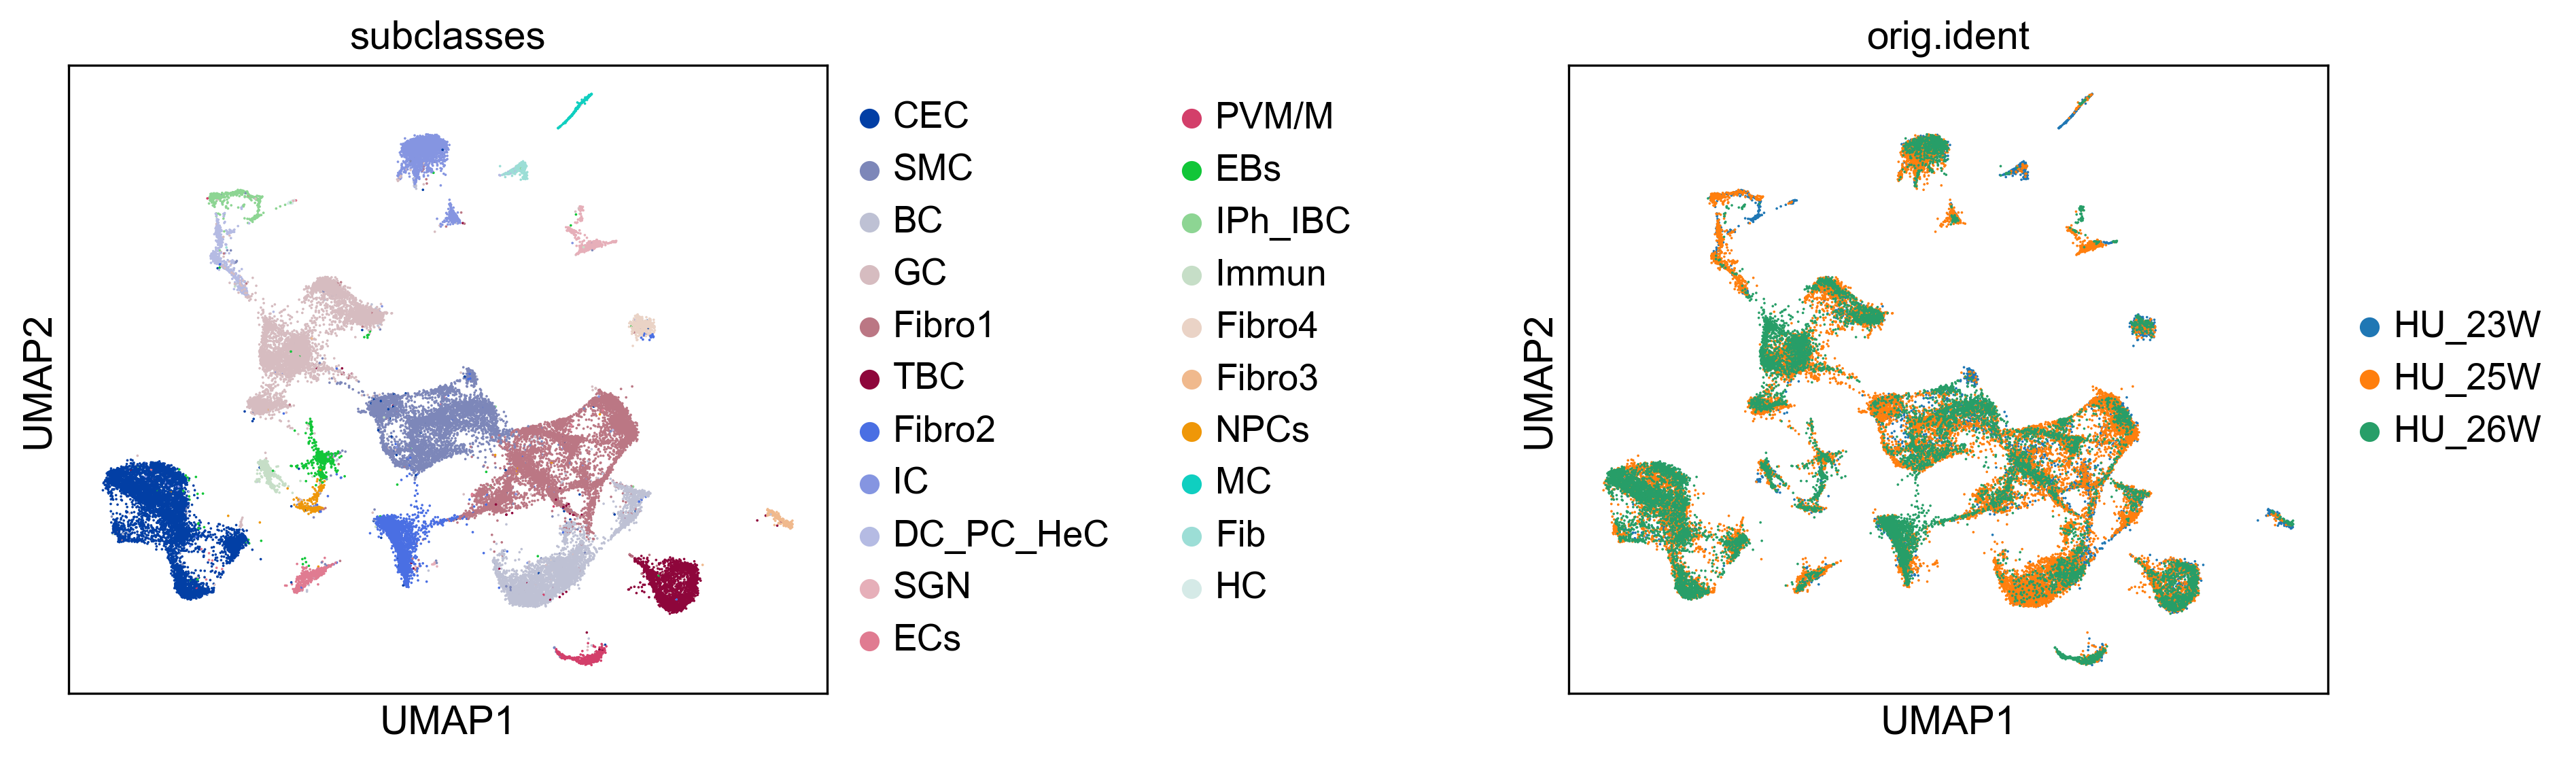

In [88]:
sc.set_figure_params(figsize=(4,4),frameon=False,dpi=150,dpi_save=600)
sc.pl.umap(
    adata_human,
    color=['subclasses','orig.ident'], 
    #legend_loc='on data',
    wspace=0.8,
    frameon=True#save="cochlea-cell_type_macaque.pdf"
)#ncols = 1,

In [19]:
adata_human2=adata_human
adata_human2

AnnData object with n_obs × n_vars = 38446 × 34064
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pHB', 'pRP', 'pMT', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'subclasses'
    var: 'name', 'n_cells'
    uns: 'subclasses_colors', 'orig.ident_colors', 'log1p'
    obsm: 'X_pca', 'X_umap'
    layers: 'scaled'

In [20]:
sc.pp.filter_genes(adata_human2,min_cells=1)

In [21]:
adata_human2.X

<38446x34064 sparse matrix of type '<class 'numpy.float64'>'
	with 79439543 stored elements in Compressed Sparse Column format>

In [22]:
adata_human2.layers["counts"] = adata_human2.X.copy() 

In [23]:
adata_human2.layers['counts']

<38446x34064 sparse matrix of type '<class 'numpy.float64'>'
	with 79439543 stored elements in Compressed Sparse Column format>

In [25]:
adata_human2.X = adata_human2.layers["counts"].copy()
sc.pp.normalize_total(adata_human2)
sc.pp.log1p(adata_human2)
adata_human2.layers["logcounts"] = adata_human2.X.copy()

In [26]:
adata_human2.layers["scaled"]=sc.pp.scale(adata_human2.X,max_value=5,copy=True)

In [27]:
adata_human2

AnnData object with n_obs × n_vars = 38446 × 34064
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pHB', 'pRP', 'pMT', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'subclasses'
    var: 'name', 'n_cells'
    uns: 'subclasses_colors', 'orig.ident_colors', 'log1p'
    obsm: 'X_pca', 'X_umap'
    layers: 'scaled', 'counts', 'logcounts'

In [28]:
adata_mouse2=adata_mouse

In [29]:
sc.pp.filter_genes(adata_mouse2,min_cells=1)
adata_mouse2.layers["counts"] = adata_mouse2.X.copy() 
adata_mouse2.X = adata_mouse2.layers["counts"].copy()
sc.pp.normalize_total(adata_mouse2)
sc.pp.log1p(adata_mouse2)
adata_mouse2.layers["logcounts"] = adata_mouse2.X.copy()
adata_mouse2.layers["scaled"]=sc.pp.scale(adata_mouse2.X,max_value=5,copy=True)
adata_mouse2


AnnData object with n_obs × n_vars = 15660 × 14529
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'subclasses'
    var: 'name', 'n_cells'
    uns: 'subclasses_colors', 'log1p'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts', 'logcounts', 'scaled'

In [80]:
sc.pp.filter_genes(adata2,min_cells=1)
adata2.layers["counts"] = adata2.X.copy() 
adata2.X = adata2.layers["counts"].copy()
sc.pp.normalize_total(adata2)
sc.pp.log1p(adata2)
adata2.layers["logcounts"] = adata2.X.copy()
adata2.layers["scaled"]=sc.pp.scale(adata2.X,max_value=5,copy=True)
adata2

AnnData object with n_obs × n_vars = 88006 × 39528
    obs: 'cell_type', 'age', 'louvain', 'leiden'
    var: 'gene_symbol', 'n_cells'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'logcounts', 'scaled'
    obsp: 'distances', 'connectivities'

In [86]:
adata2.obs['cell_type'].value_counts()

B cells                                  13414
Erythrocytes                             12858
Intermediate stria                        9236
Tympanic border cells                     7698
Neutrophils                               6360
SS1                                       4701
Osteocytes                                4323
Macrophages                               4223
Schwann cells                             3464
Monocytes                                 2567
Fibrocytes                                1935
Glial cells                               1655
T cells                                   1518
Pre-osteoblasts                           1287
Inner border-phalangeal/ Hensen cells      988
Claudius/Inner-Outer sulcus cells          921
Scala vestibuli border cells               875
NK cells                                   841
SS2                                        746
Root cells                                 734
Marginal stria                             722
Osteoblasts  

In [89]:
cluster_annotation = {
    'B cells': 'Immun',
    'Erythrocytes': 'ECs',
    'Intermediate stria': 'IC',
    'Tympanic border cells': 'TBC',
    'Neutrophils': 'Immun',
    'SS1': 'OB',
    'Osteocytes': 'OB',
    'Macrophages': 'Immun',
    'Schwann cells': 'GC',
    'Monocytes': 'Immun',
    'Fibrocytes': 'Fibrocytes',
    'Glial cells': 'GC',
    'T cells': 'Immun',
    'Pre-osteoblasts': 'OB',
    'Inner border-phalangeal/ Hensen cells': 'IPh_IBC',
    'Claudius/Inner-Outer sulcus cells': 'DC_PC_HeC',
    'Scala vestibuli border cells': 'IPh_IBC',
    'NK cells': 'Immun',
    'SS2': 'OB',
    'Root cells': 'SpC_RC',
    'Marginal stria': 'MC',
    'Osteoblasts': 'OB',
    "Deiter's cells" : 'DC_PC_HeC',
    'Endothelial cells': 'CEC',
    'Glial precursor cells': 'GC',
    'Spindle cells': 'SpC_RC',
    'Inner hair cells': 'IHC',
    'Pillar cells': 'DC_PC_HeC',
    'Reissner membrane': 'Reissner membrane',
    'Mast cells': 'Immun',
    'Type I Neurons': 'SGN',
    'Pericytes': 'Immun',
    'Interdental cells': 'IDC',
    'Smooth muscle cells': 'SMC',
    'Basal stria': 'BC',
    'Type I Neurons': 'SGN'
}

adata2.obs['subclasses'] = adata2.obs['cell_type'].map(cluster_annotation).astype('category')

In [36]:
#genes related autosomal nonsyndromic hearing loss
markers = ['DIAPH1', 'KCNQ4', 'IFNLR1', 'GJB2', 'GJB6', 'MYH14',"CEACAM16",'WFS1','LMX1A','TECTA','COCH','EYA4','MYO7A','COL11A2','POU4F3',
          'MYH9','ACTG1','MYO6','SIX1','SLC17A8','REST','GRHL2','NLRP3','TMC1','COL11A1','CRYM','P2RX2','CCDC50','TJP2','TNC','TBC1D24',
'CD164','OSBPL2','HOMER2','KITLG','MCM2','PTPRQ','DMXL2','MYO3A','PDE1C','TRRAP','PLS1','ATP2B2','SLC12A2','MAP1B',

          ]#'SCD5',

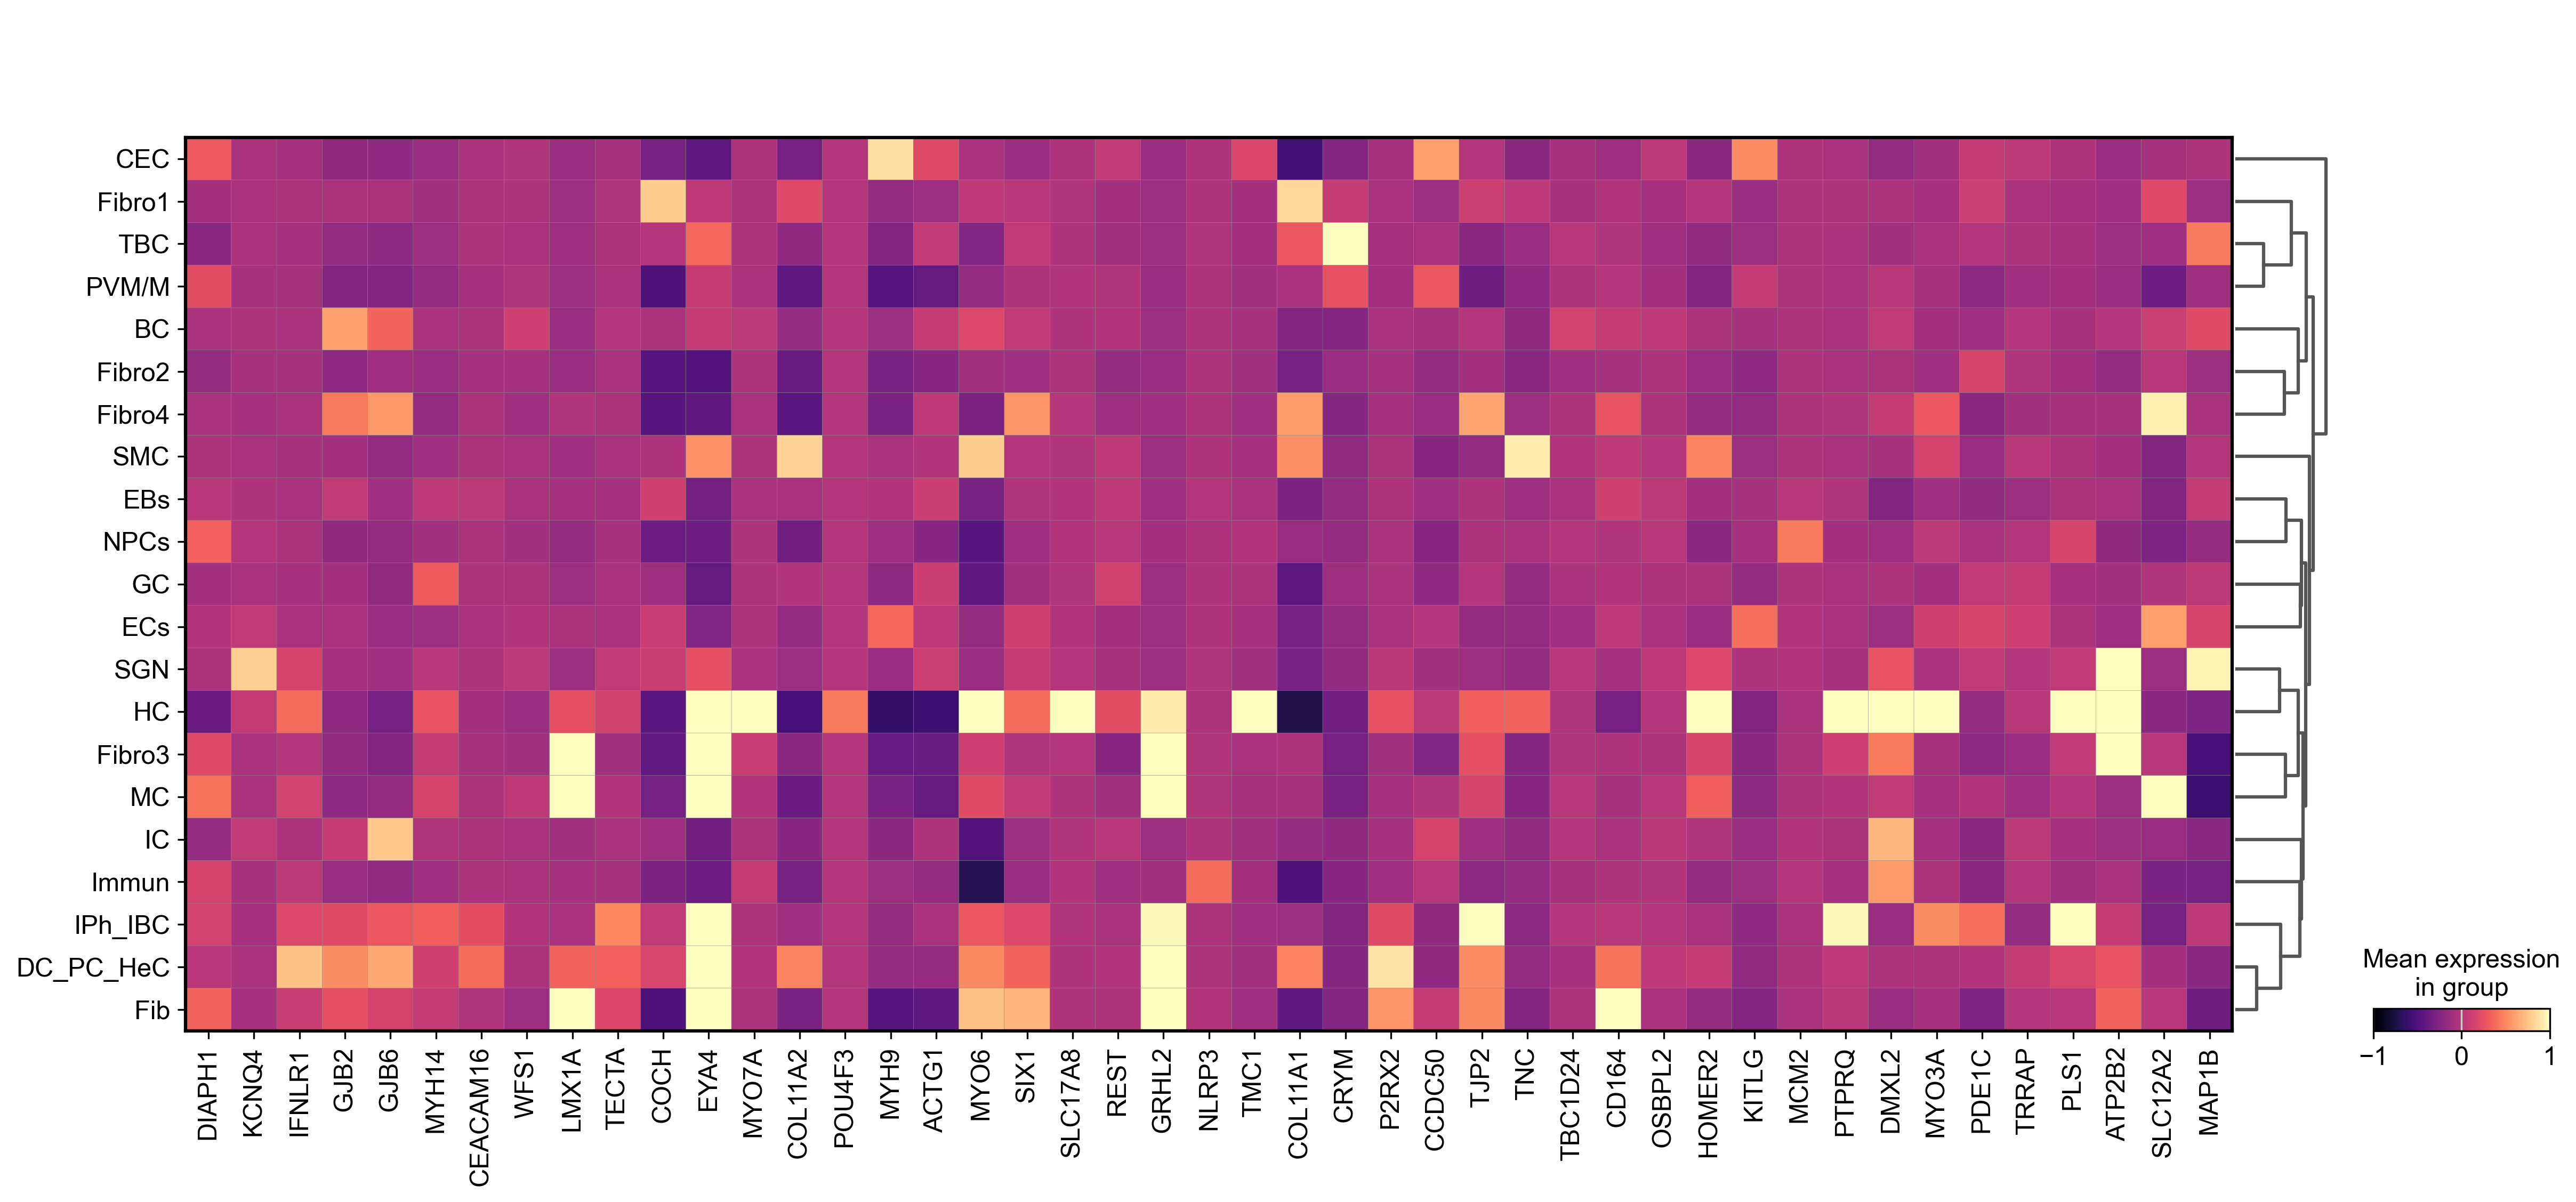

In [45]:
sc.set_figure_params(figsize=(4,4),frameon=False,dpi=150,dpi_save=600)
sc.tl.dendrogram(adata_human2,groupby='subclasses')
gs = sc.pl.matrixplot(adata_human2, markers, groupby='subclasses',layer="scaled",dendrogram=True,vmin=-1,cmap="magma",vmax=1,
   save="autosomal_nonsyndromic_human.pdf"
                     )

In [34]:
#genes related autosomal nonsyndromic hearing loss
markers = ['DIAPH1', 'KCNQ4', 'IFNLR1', 'GJB2', 'GJB6', 'MYH14',"CEACAM16",'WFS1','LMX1A','TECTA','COCH','EYA4','MYO7A','COL11A2','POU4F3',
          'MYH9','ACTG1','MYO6','SIX1','SLC17A8','REST','GRHL2','NLRP3','TMC1','COL11A1','CRYM','P2RX2','CCDC50','TJP2','TNC','TBC1D24',
'CD164','OSBPL2','HOMER2','KITLG','MCM2','PTPRQ','DMXL2','MYO3A','PDE1C','TRRAP','PLS1','ATP2B2','SLC12A2','MAP1B',

          ]#'SCD5',

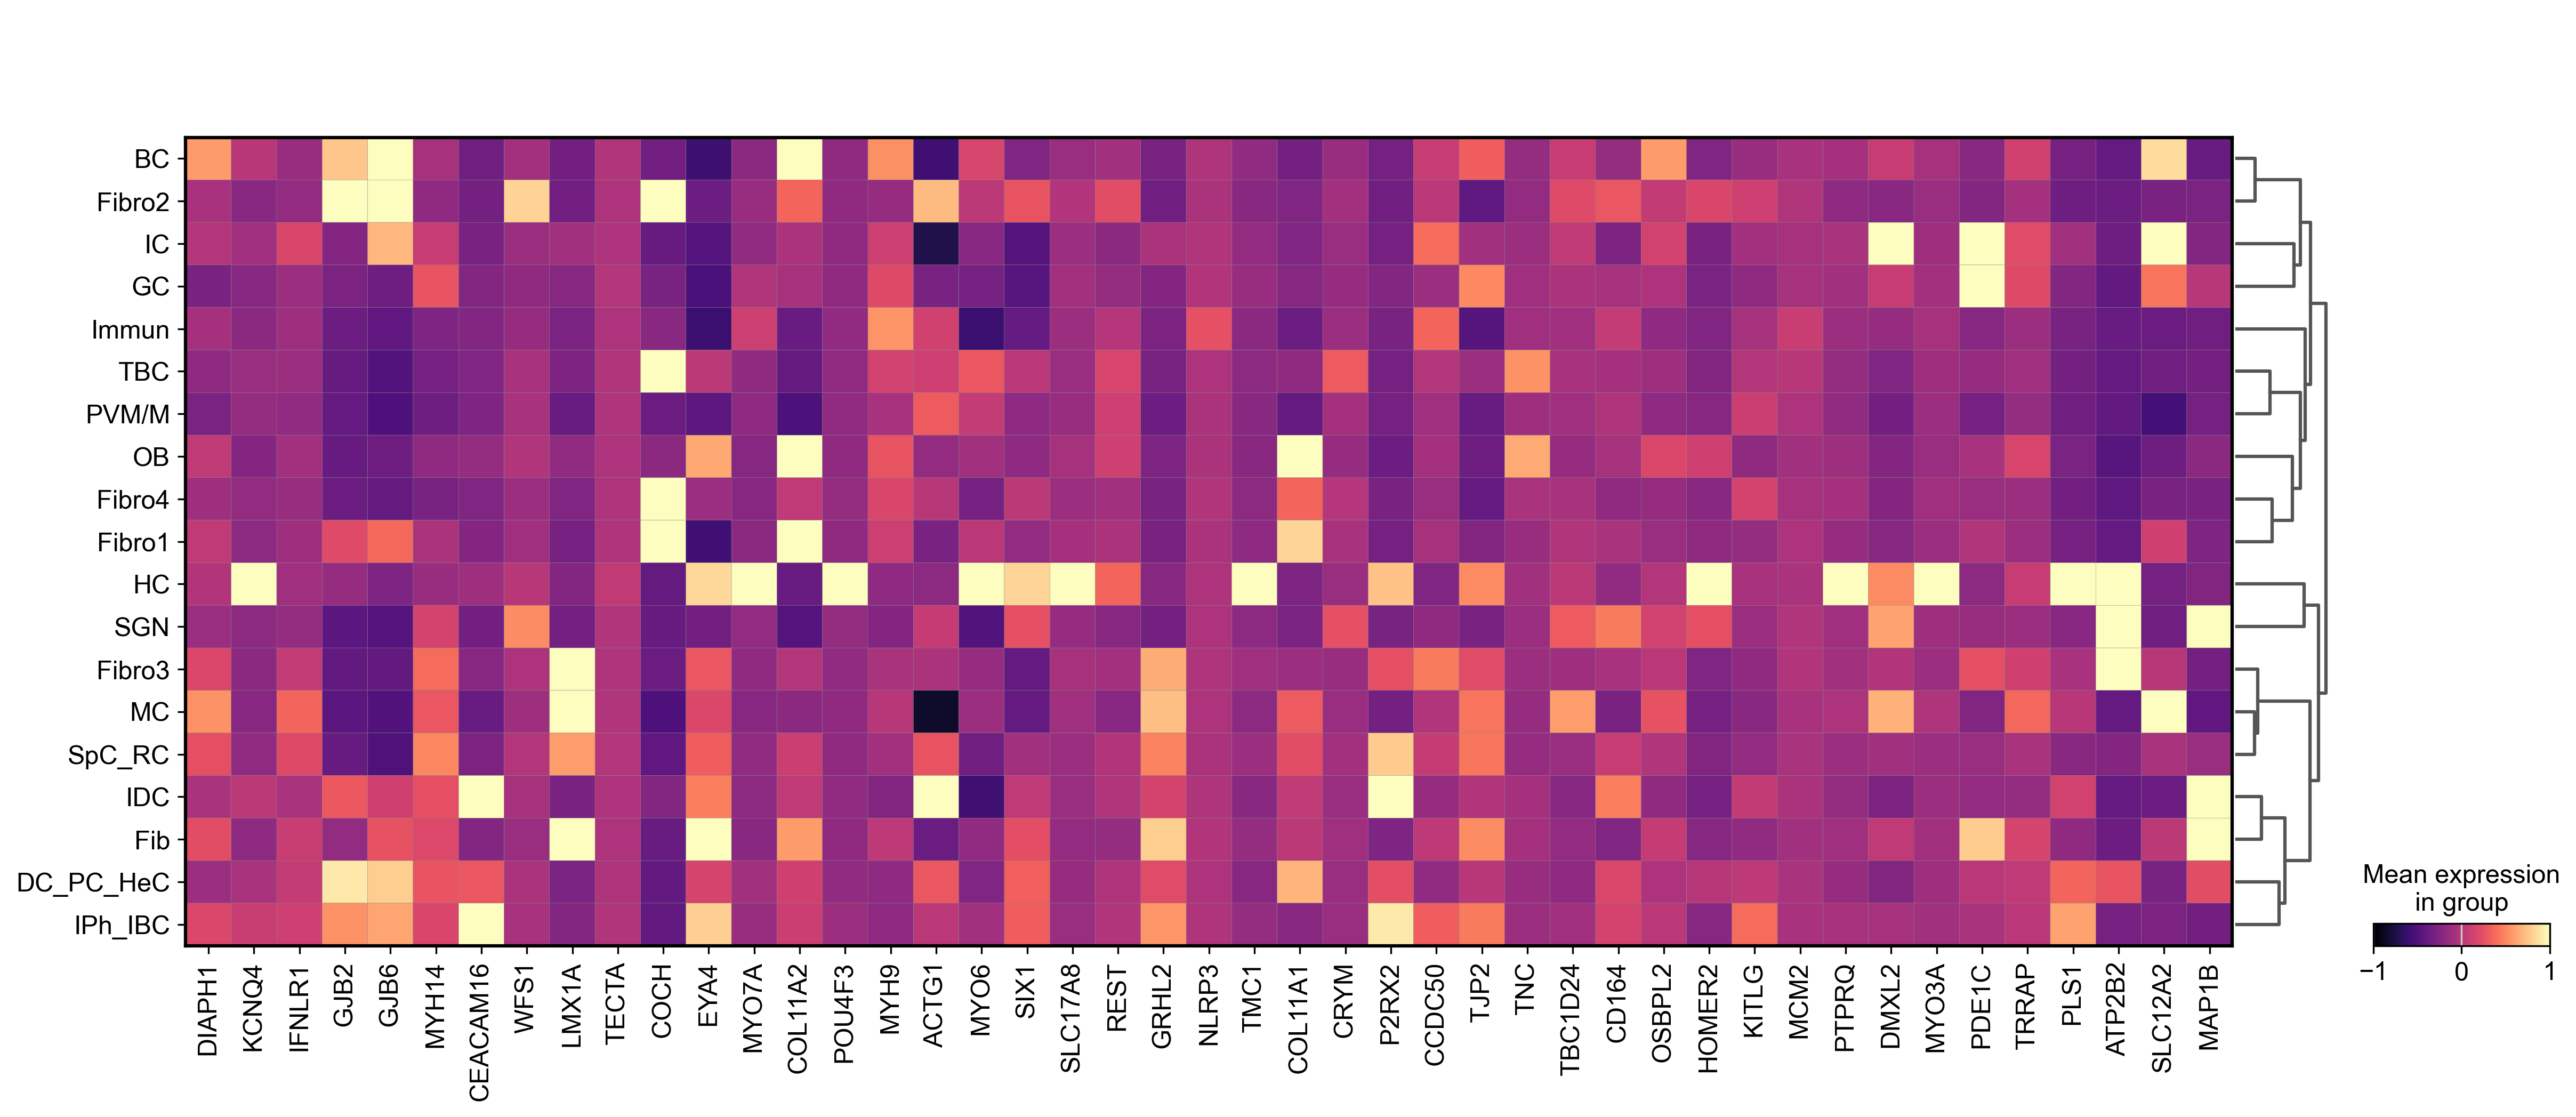

In [46]:
sc.set_figure_params(figsize=(4,4),frameon=False,dpi=150,dpi_save=600)
sc.tl.dendrogram(adata_mouse2,groupby='subclasses')
gs = sc.pl.matrixplot(adata_mouse2, markers, groupby='subclasses',layer="scaled",dendrogram=True,vmin=-1,cmap="magma",
    vmax=1,save="autosomal_nonsyndromic_mouse.pdf"
                     )

In [81]:
#genes related autosomal nonsyndromic hearing loss
markers = ['Diaph1', 'Kcnq4', 'Ifnlr1', 'Gjb2', 'Gjb6', 'Myh14',"Ceacam16",'Wfs1','Lmx1a','Tecta','Coch','Eya4','Myo7a','Col11a2','Pou4f3',
          'Myh9','Actg1','Myo6','Six1','Slc17a8','Rest','Grhl2','Nlrp3','Tmc1','Col11a1','Crym','P2rx2','Ccdc50','Tjp2','Tnc','Tbc1d24',
'Cd164','Osbpl2','Homer2','Kitl','Mcm2','Ptprq','Dmxl2','Myo3a','Pde1c','Trrap','Pls1','Atp2b2','Slc12a2','Map1b',

          ]#'Scd5'

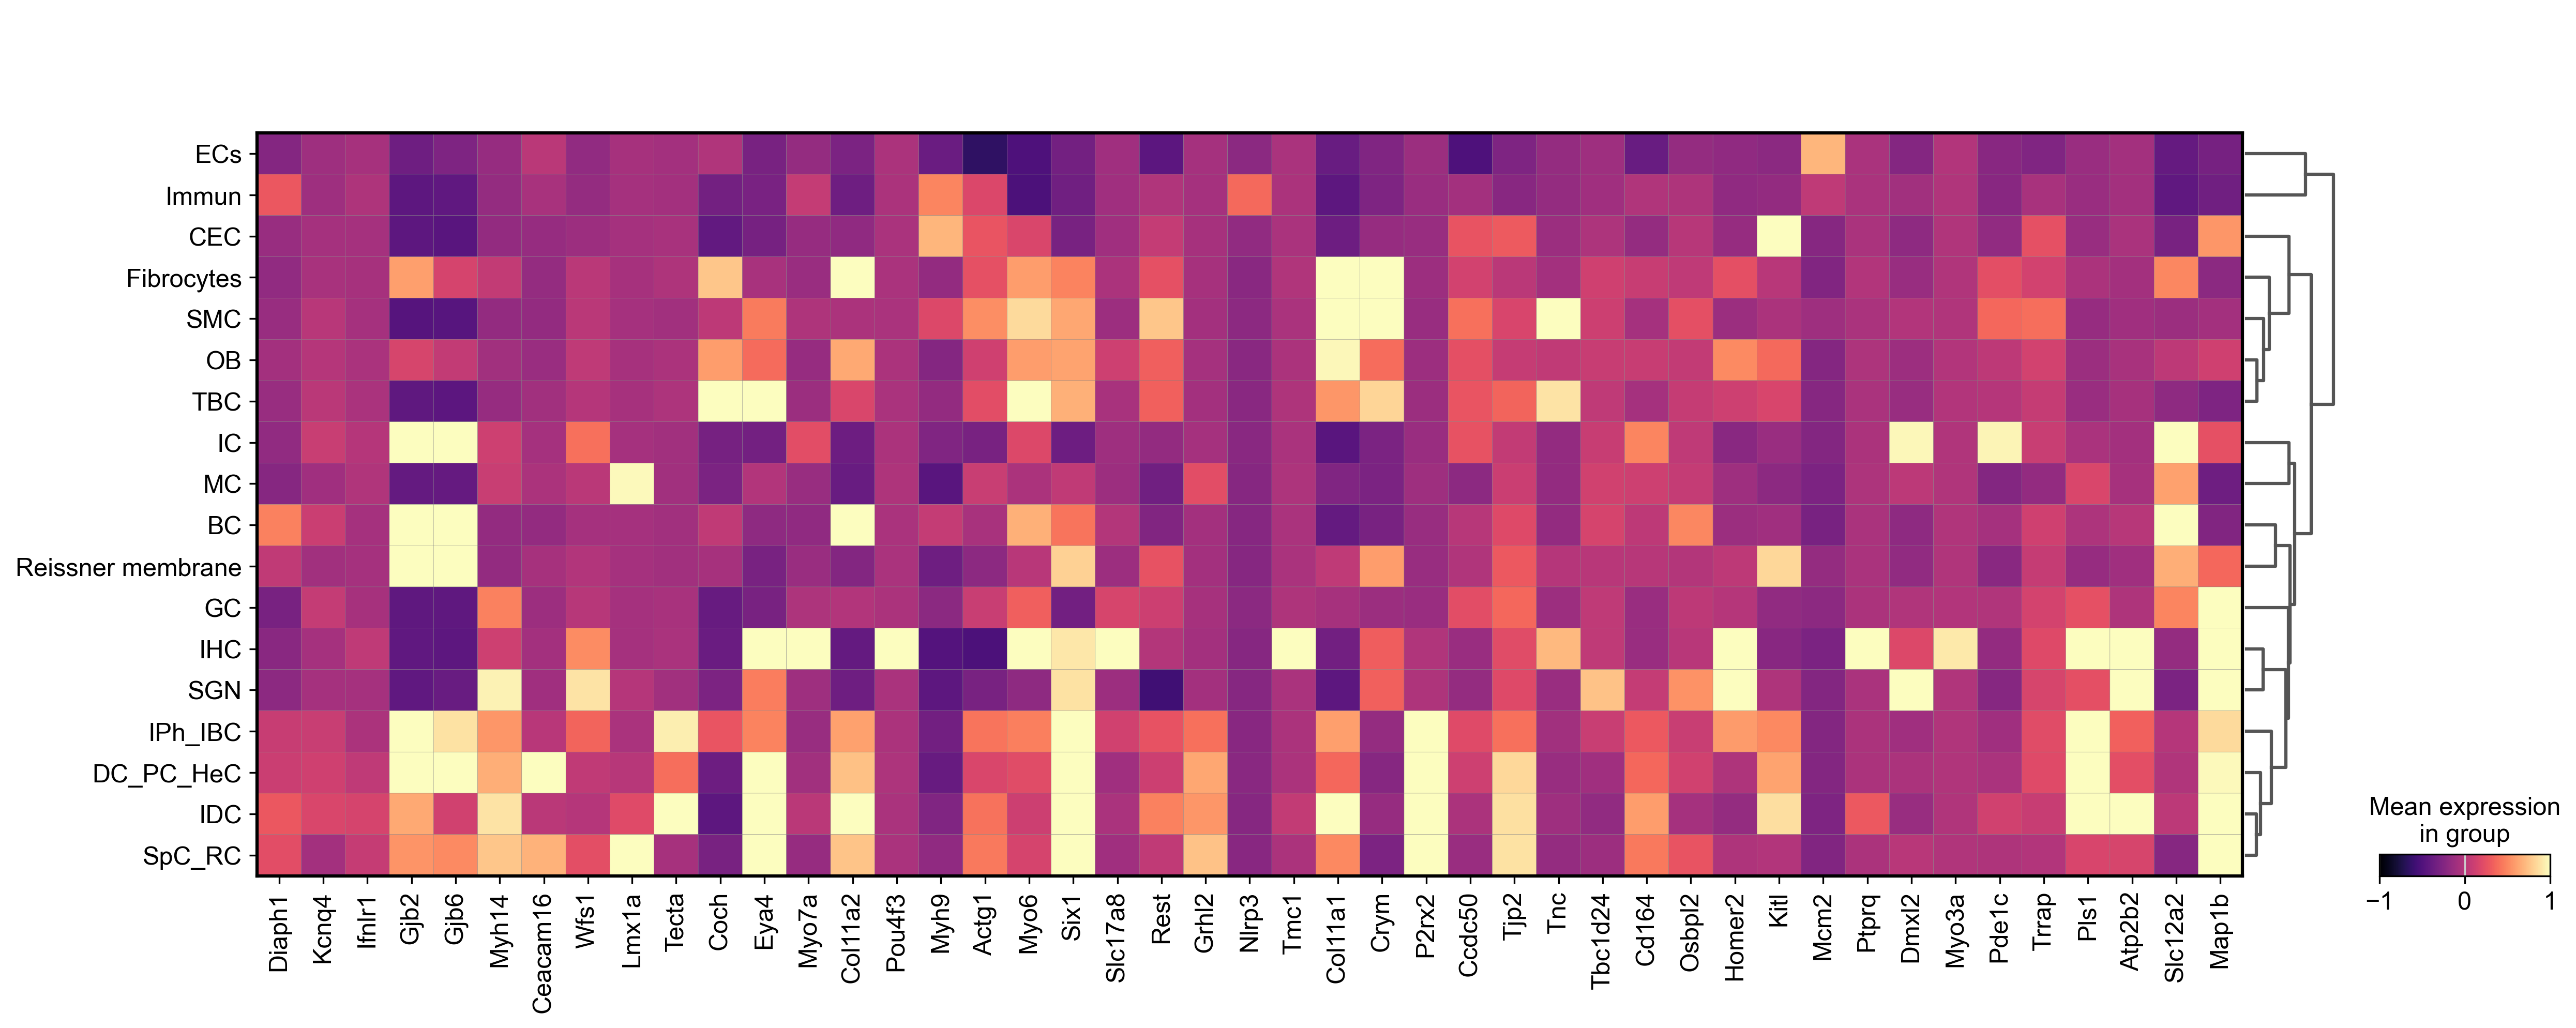

In [90]:
sc.set_figure_params(figsize=(4,4),frameon=False,dpi=150,dpi_save=600)
sc.tl.dendrogram(adata2,groupby='cell_type')
gs = sc.pl.matrixplot(adata2, markers, groupby='subclasses',layer="scaled",dendrogram=True,vmin=-1,cmap="magma",gene_symbols='gene_symbol',
    vmax=1,save="autosomal_nonsyndromic_mouse_pnas.pdf"
                     )

In [91]:
#genes related autosomal recessive nonsyndromic hearing loss
markers = ['GJB2',
'MYO7A','MYO15A','SLC26A4','TMIE','TMC1','TMPRSS3','OTOF','CDH23',
'GIPC3','USH1C','OTOG','TECTA','OTOA',
'PCDH15','RDX','GRXCR1','GAB1','TRIOBP','CLDN14','MYO3A','ESRRB','MYO6','HGF','ADCY1','CIB2','MARVELD2','BDP1',
'COL11A2','PDZD7','SLC22A4','SLC26A5','DCDC2','LHFPL5',
'S1PR2','PNPT1','BSND','MSRB3','SYNE4','LOXHD1','TPRN','PTPRQ','OTOGL','TBC1D24','SERPINB6','CABP2',
           'NARS2','MET','TMEM132E','PPIP5K2','GRXCR2','EPS8',
'CLIC5','EPS8L2','ROR1','WBP2','ESRP1','MPZL2','CEACAM16','SPNS2','CLDN9','CLRN2','GAS2',
           'ELMOD3','ESPN','PJVK','STRC','TSPEAR','WHRN'
          ]#'FAM65B','LDR1','GRAP', 'KARS', 'LRTOMT'

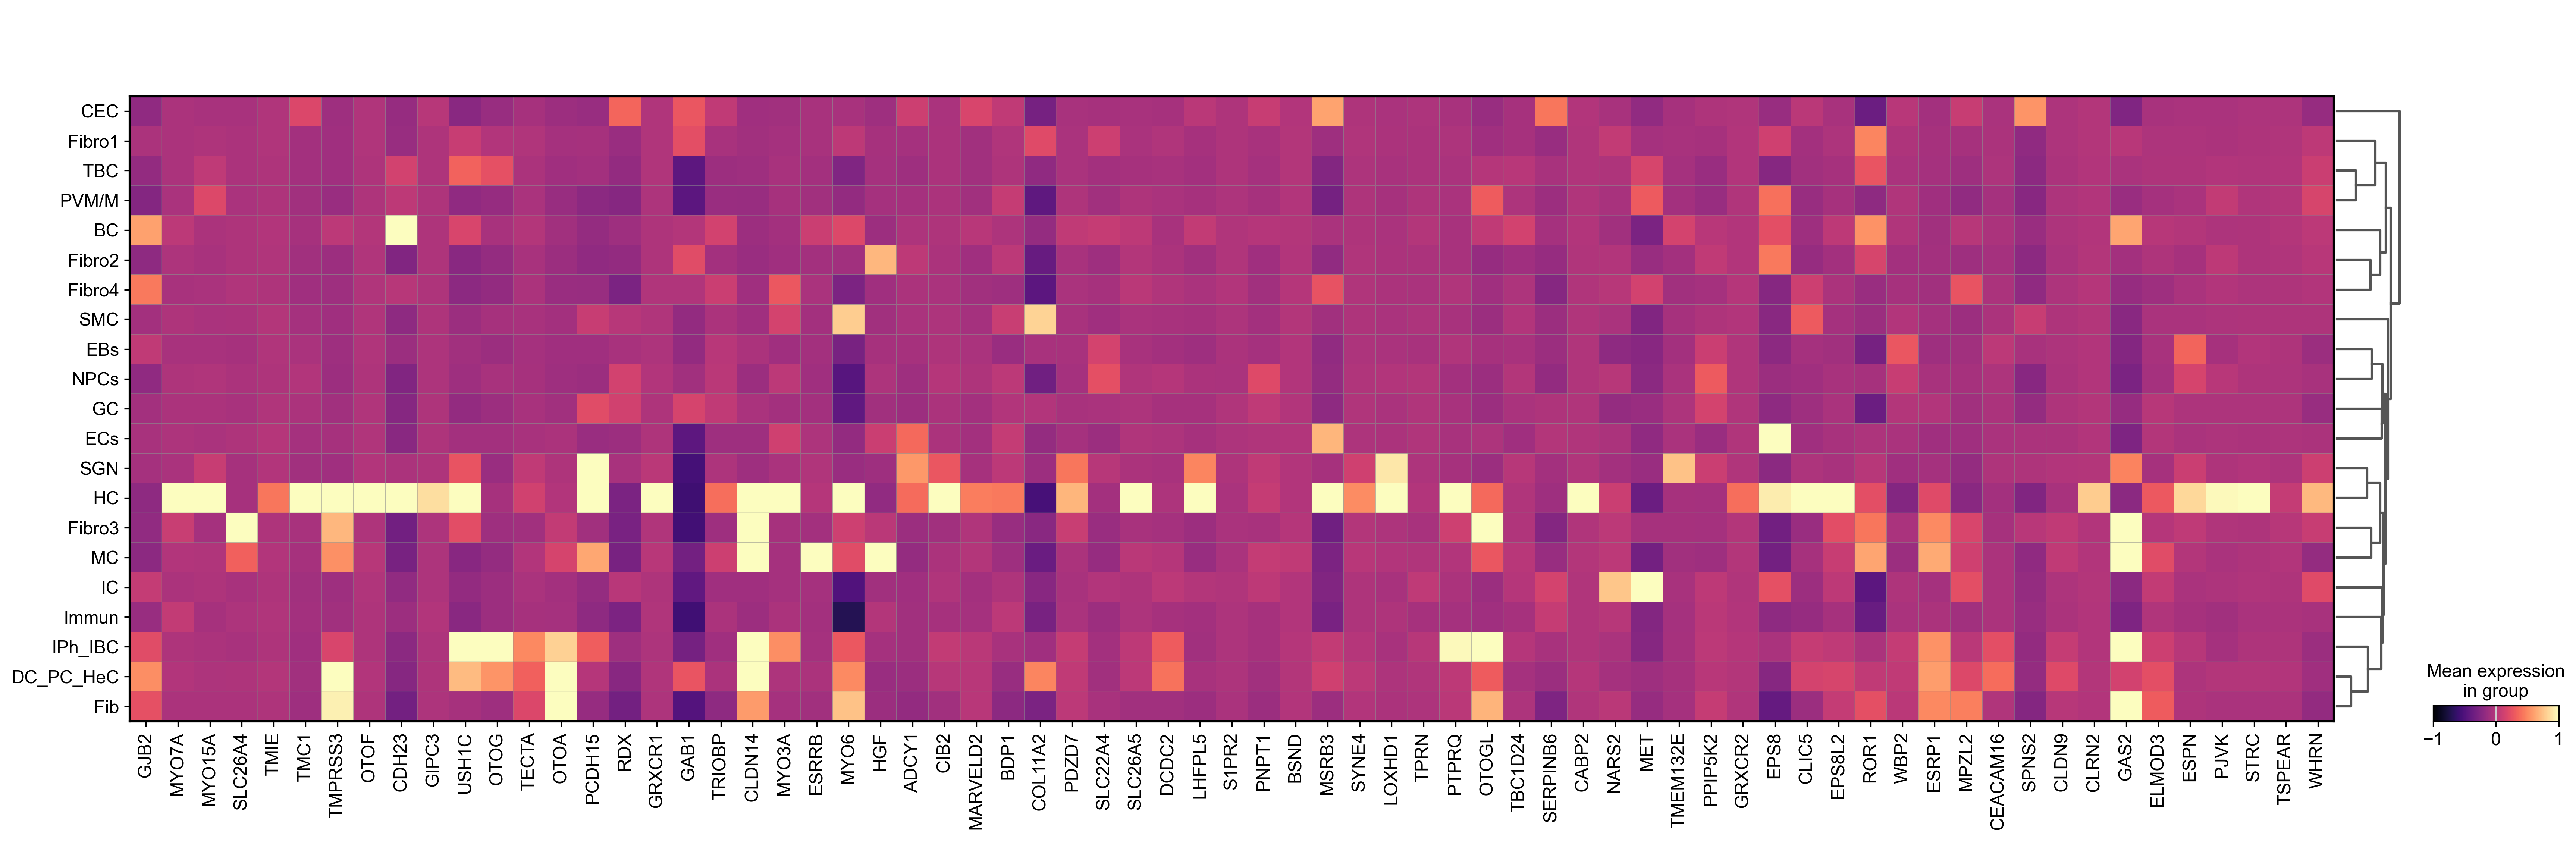

In [92]:
sc.set_figure_params(figsize=(4,4),frameon=False,dpi=150,dpi_save=600)
sc.tl.dendrogram(adata_human2,groupby='subclasses')
gs = sc.pl.matrixplot(adata_human2, markers, groupby='subclasses',layer="scaled",dendrogram=True,vmin=-1,cmap="magma",
    vmax=1,save="autosomal_ recessive_human.pdf"
                     )

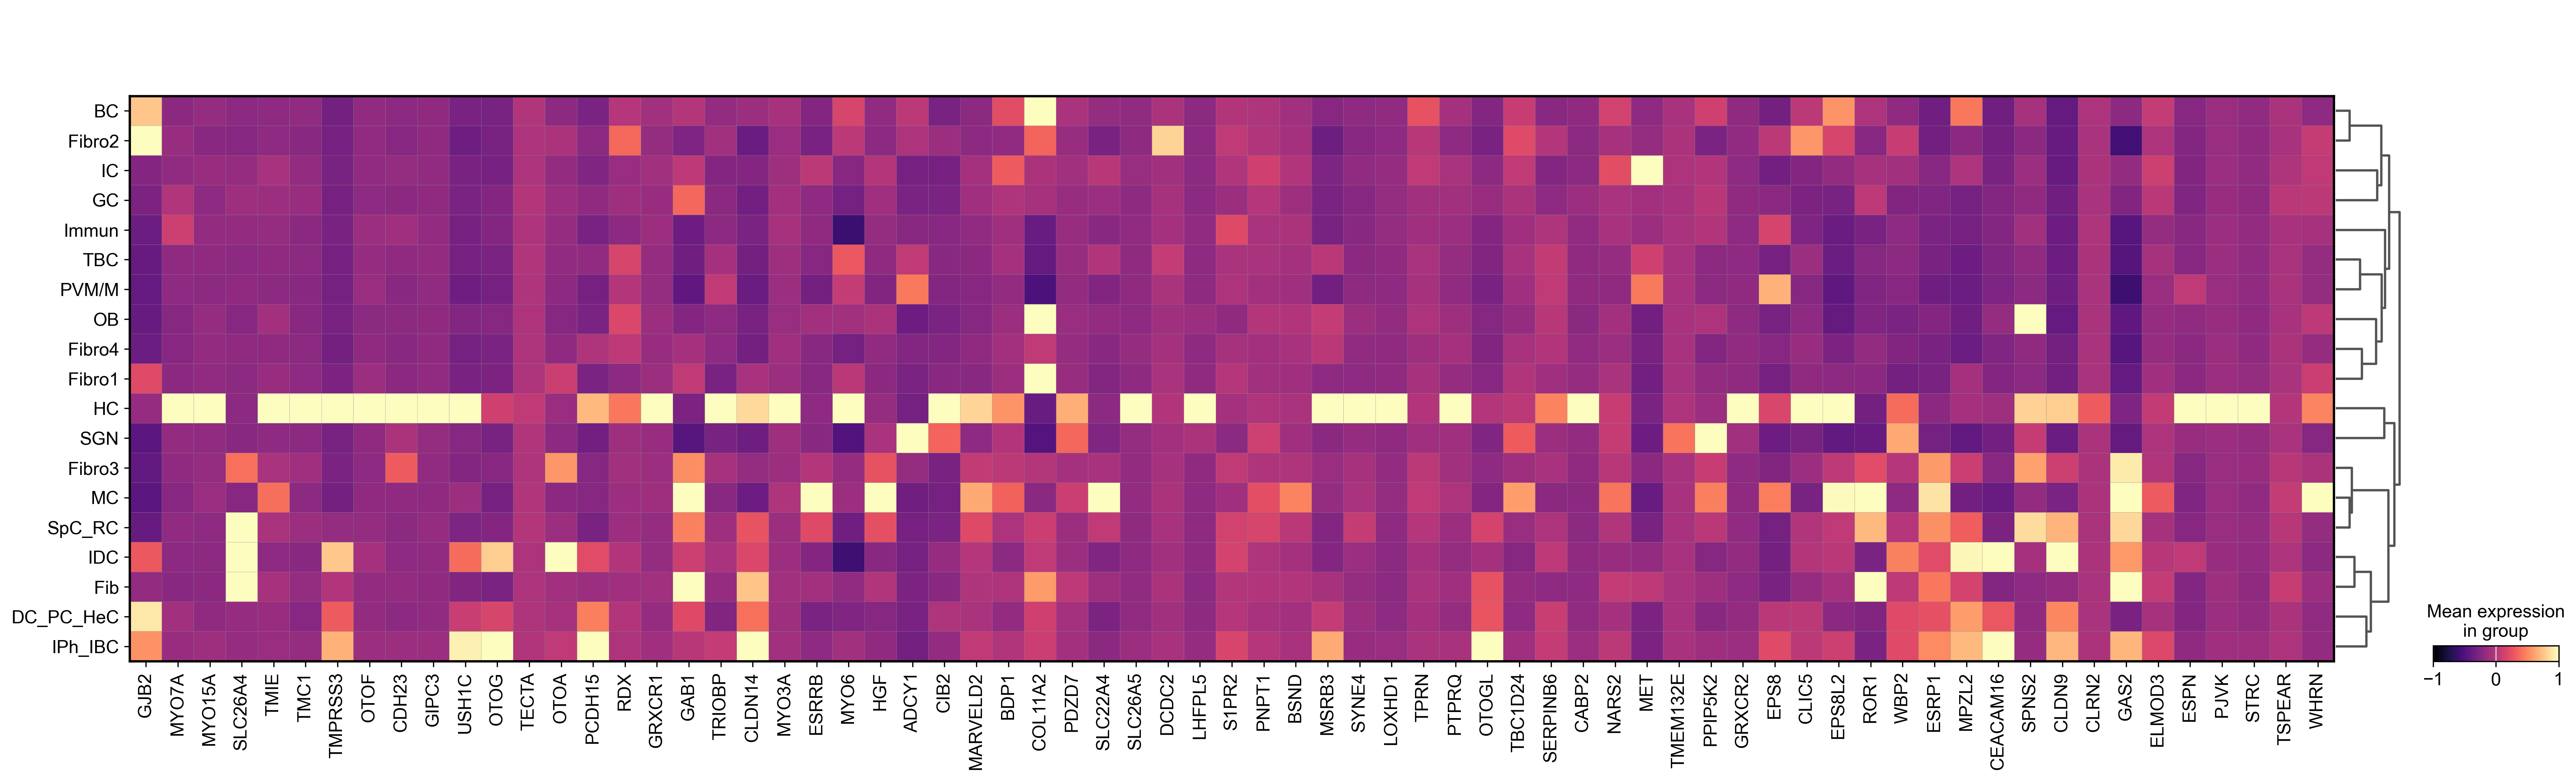

In [93]:
sc.set_figure_params(figsize=(4,4),frameon=False,dpi=150,dpi_save=600)
sc.tl.dendrogram(adata_mouse2,groupby='subclasses')
gs = sc.pl.matrixplot(adata_mouse2, markers, groupby='subclasses',layer="scaled",dendrogram=True,vmin=-1,cmap="magma",
    vmax=1,save="autosomal_ recessive_mouse.pdf"
                     )

In [100]:
#genes related autosomal recessive nonsyndromic hearing loss
markers = ['Gjb2',
'Myo7a','Myo15','Slc26a4','Tmie','Tmc1','Tmprss3','Otof','Cdh23',
'Gipc3','Ush1c','Otog','Tecta','Otoa',
'Pcdh15','Rdx','Grxcr1','Gab1','Triobp','Cldn14','Myo3a','Esrrb','Myo6','Hgf','Adcy1','Cib2','Marveld2','Bdp1',
'Col11a2','Pdzd7','Slc22a4','Slc26a5','Dcdc2a','Lhfpl5',
'S1pr2','Pnpt1','Bsnd','Msrb3','Syne4','Loxhd1','Tprn','Ptprq','Otogl','Tbc1d24','Cabp2',
           'Nars2','Met','Tmem132e','Ppip5k2','Grxcr2','Eps8',
'Clic5','Eps8l2','Ror1','Wbp2','Esrp1','Mpzl2','Ceacam16','Spns2','Cldn9','Clrn2','Gas2',
           'Elmod3','Espn','Pjvk','Strc','Tspear','Whrn','Elmod3','Espn','Grap','Pjvk','Strc','Tspear','Whrn',
          ]#'FAM65B','LDR1','GRAP', 'KARS', 'LRTOMT'

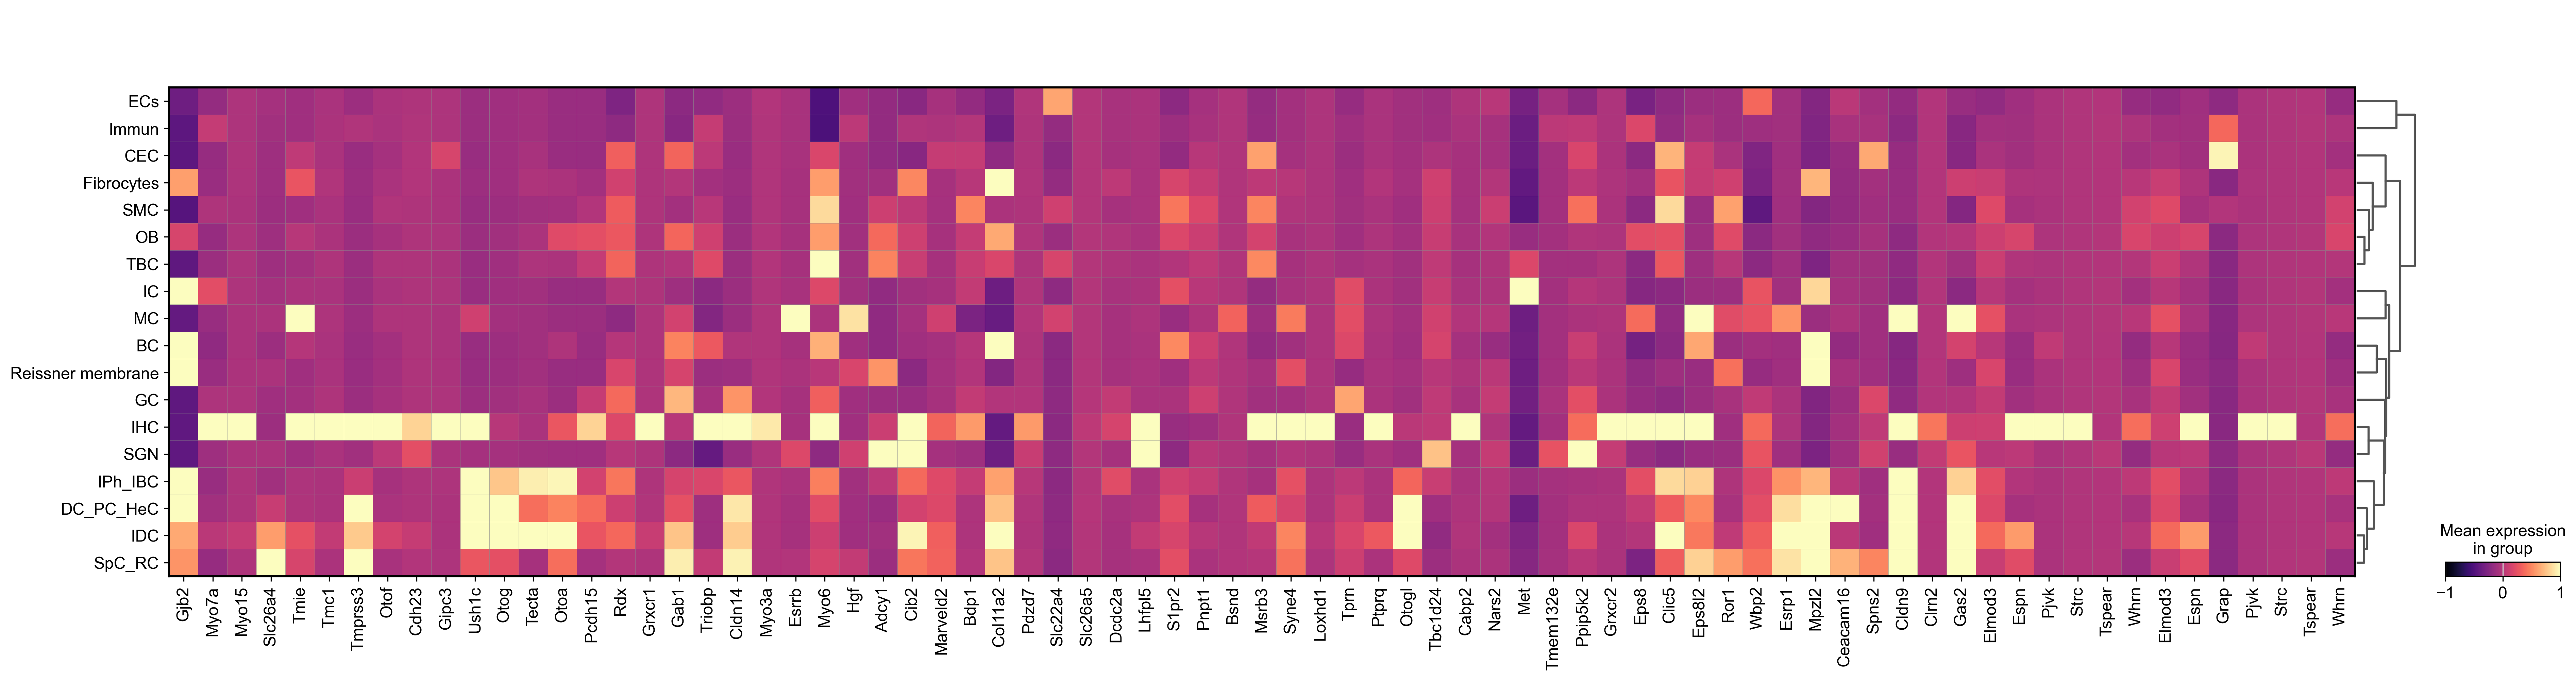

In [101]:
sc.set_figure_params(figsize=(4,4),frameon=False,dpi=150,dpi_save=600)
sc.tl.dendrogram(adata2,groupby='cell_type')
gs = sc.pl.matrixplot(adata2, markers, groupby='subclasses',layer="scaled",dendrogram=True,vmin=-1,cmap="magma",gene_symbols='gene_symbol',
    vmax=1,save="autosomal_ recessive_mouse_pnas.pdf"
                     )

In [98]:
#genes related x-linked nonsyndromic age_related cisplatin_related hearing loss
markers = ['PRPS1','POU3F4','SMPX','AIFM1','COL4A6','DIAPH3','ACVR1B','CCBE1','CNTNAP2','EIF4ENIF1','ISG20','NCALD',
'PRR14L','SFI1','SV2B','ZNF691','GRM8','IQGAP2','DCLK1','CDH13','PTPRD','CMIP',
'ESRRG','SIK3','PCDH20','SLC28A3','TRIOBP','ILDR1','EYA4','CEP104','SLC44A2','STRN','ARHGAP35',
'FAT2','LPP','NHSL1','OSBPL5','POU6F1','PDSS1','SCARA5','SH2D4B','VAV3','GRM7','ST6GALNAC5'
          ]#'METTL13','FAM167A'

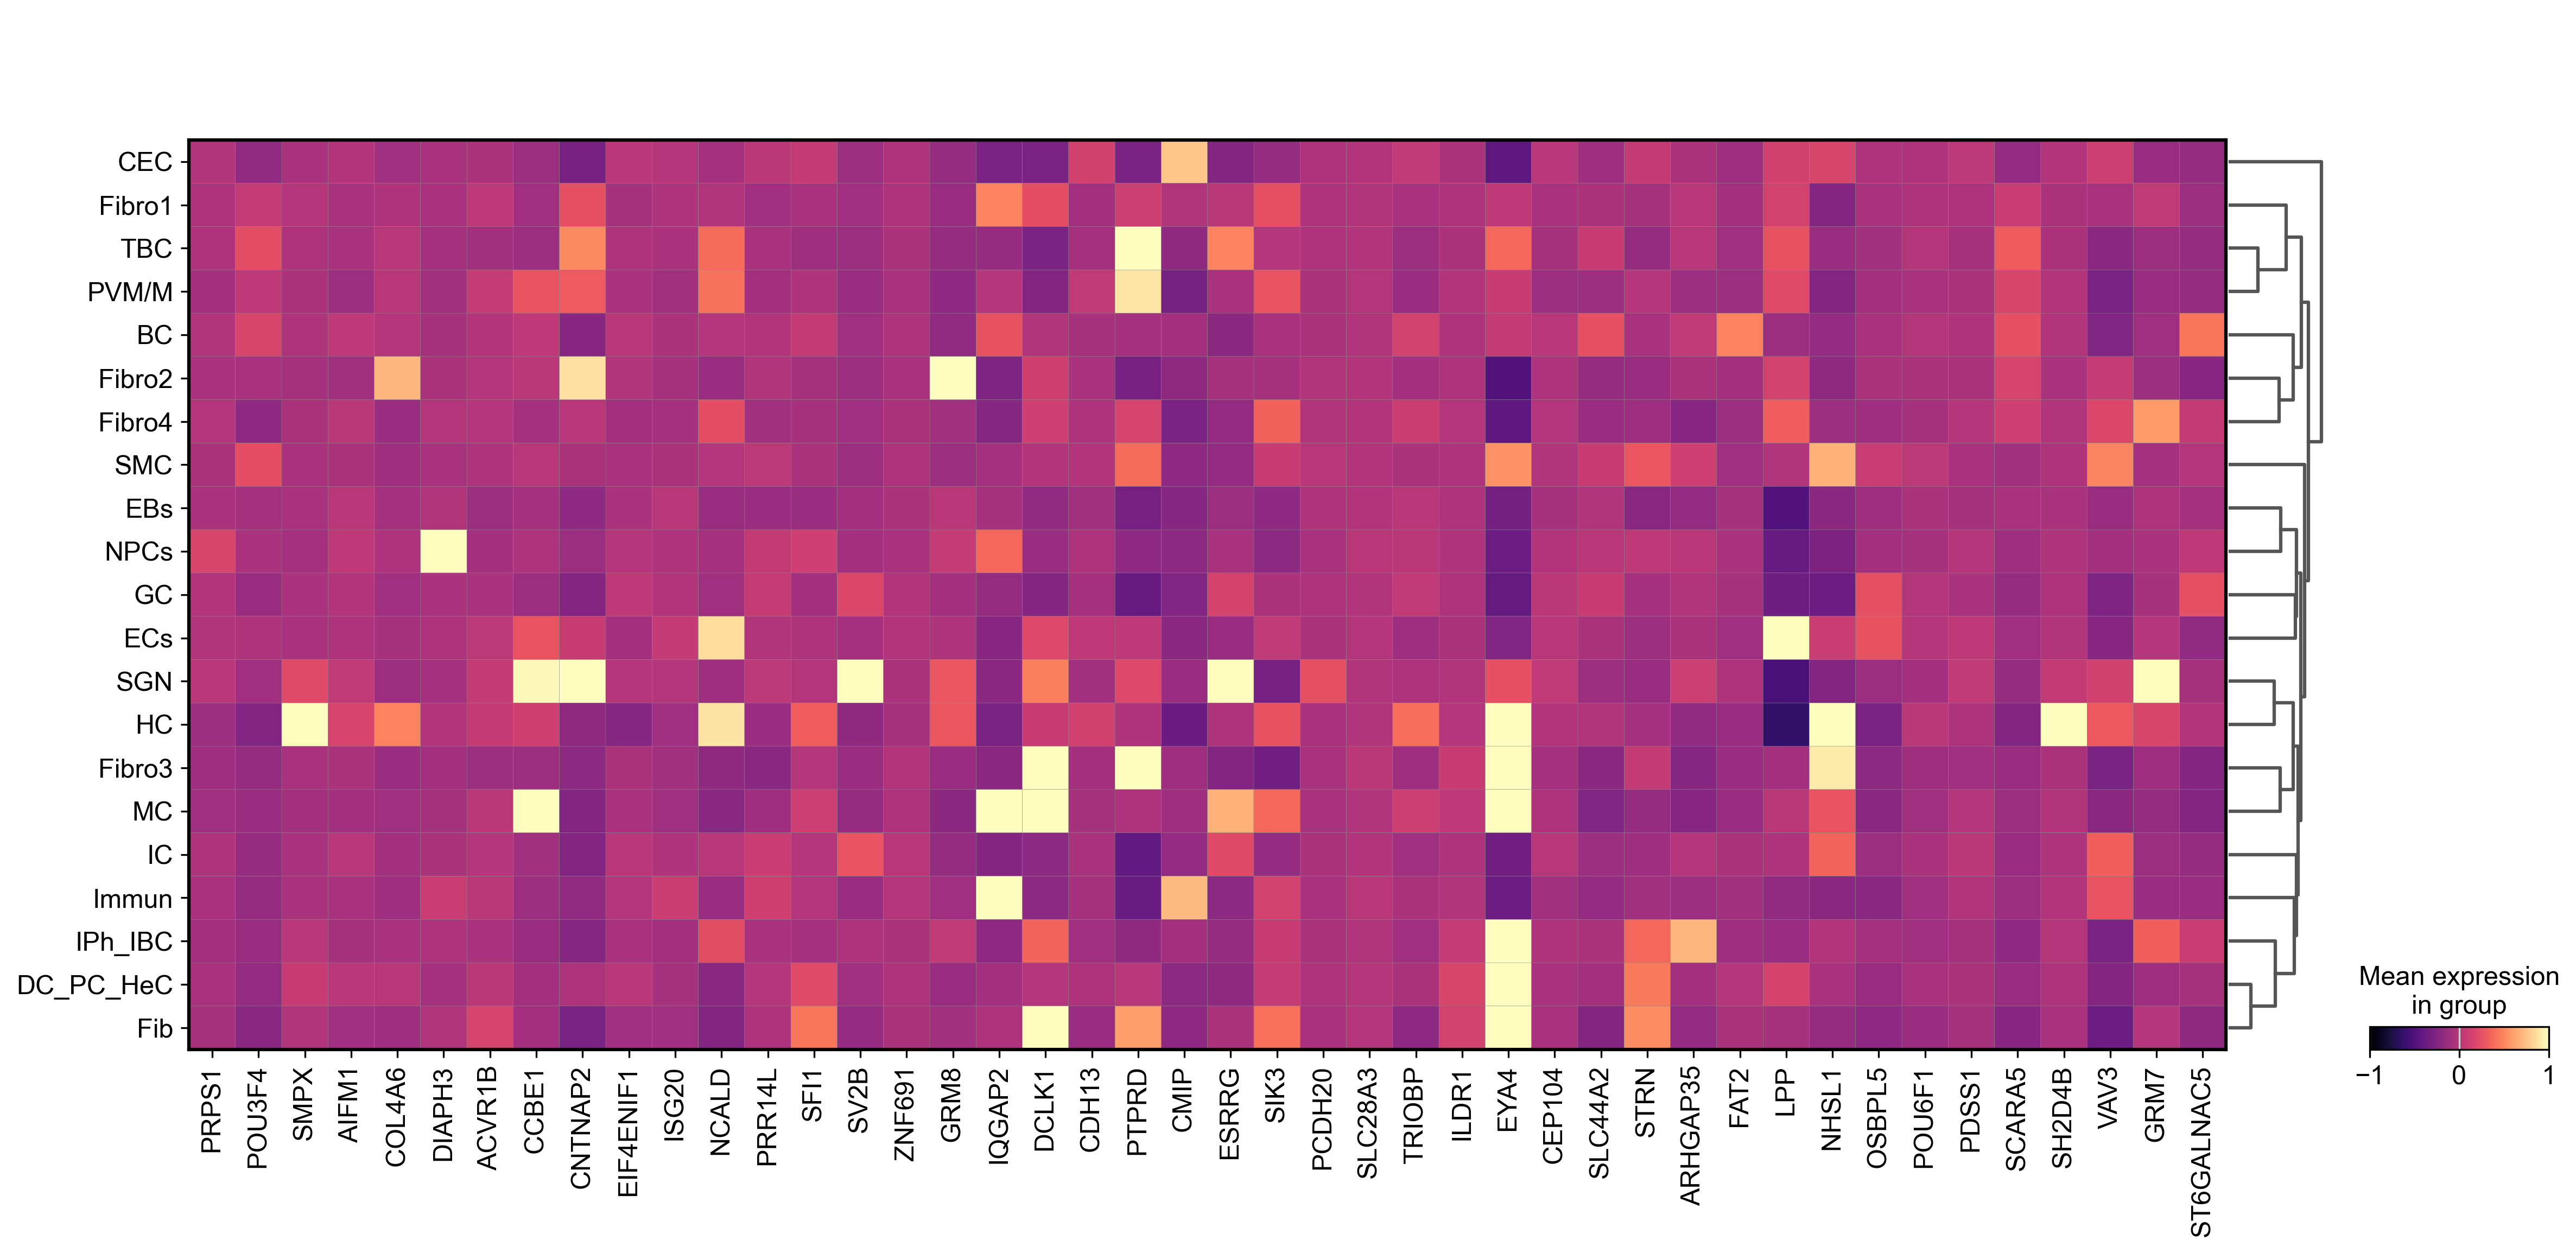

In [99]:
sc.set_figure_params(figsize=(4,4),frameon=False,dpi=150,dpi_save=600)
sc.tl.dendrogram(adata_human2,groupby='subclasses')
gs = sc.pl.matrixplot(adata_human2, markers, groupby='subclasses',layer="scaled",dendrogram=True,vmin=-1,cmap="magma",
    vmax=1,save="x_link_age_cisplatin_ recessive_human.pdf"
                     )

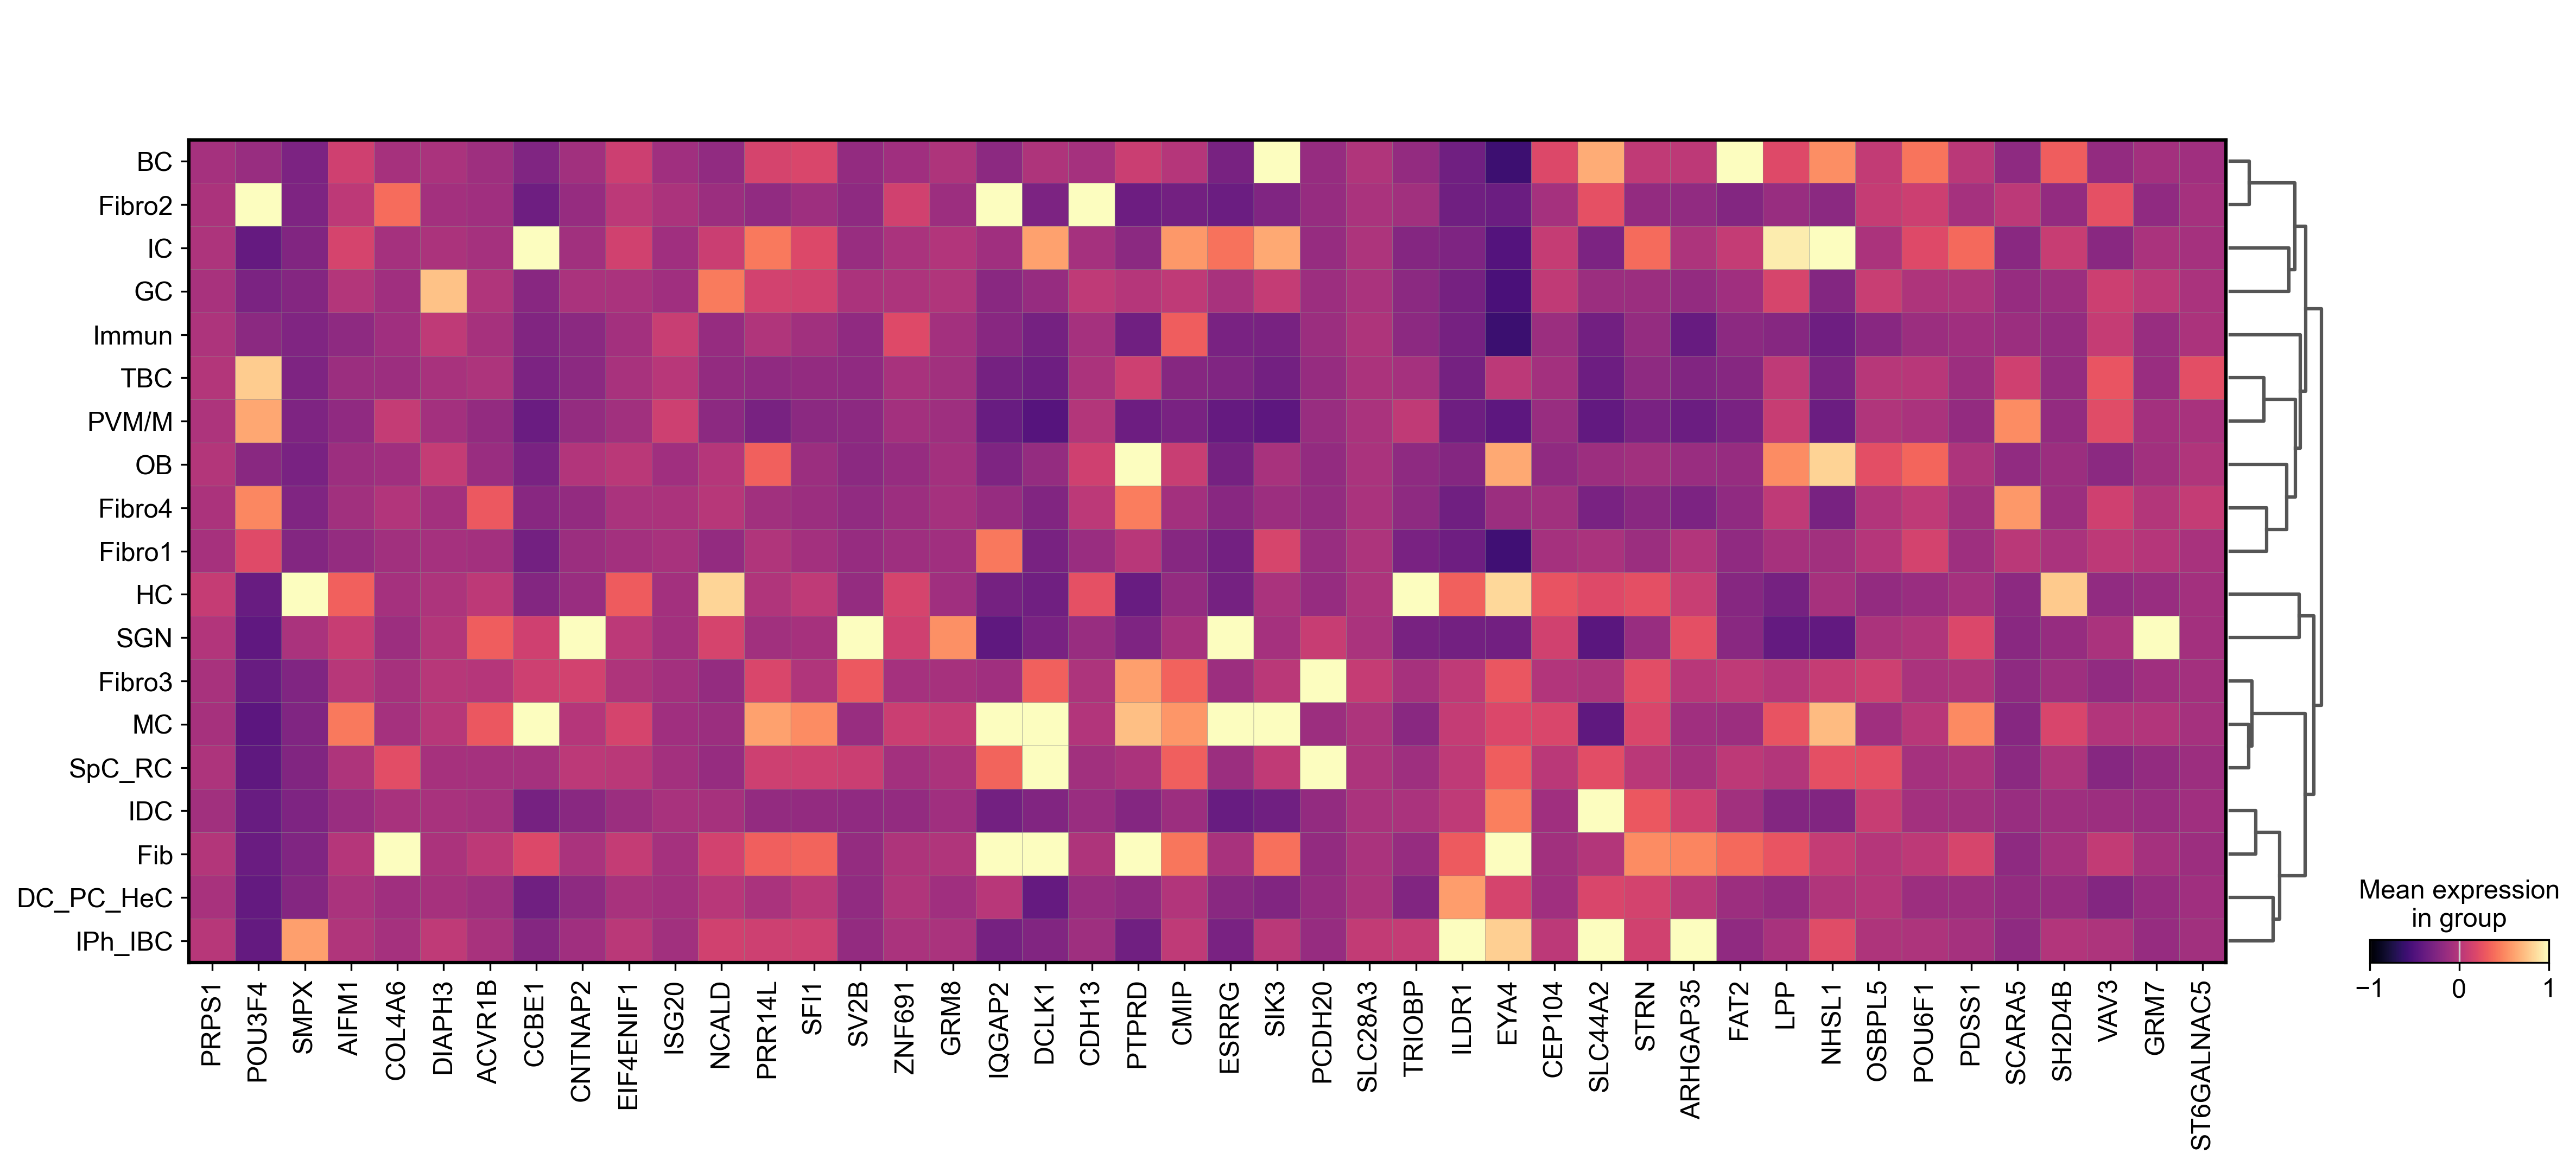

In [63]:
sc.set_figure_params(figsize=(4,4),frameon=False,dpi=150,dpi_save=600)
sc.tl.dendrogram(adata_mouse2,groupby='subclasses')
gs = sc.pl.matrixplot(adata_mouse2, markers, groupby='subclasses',layer="scaled",dendrogram=True,vmin=-1,cmap="magma",
    vmax=1,save="x_link_age_cisplatin_ recessive_mouse.pdf"
                     )

In [102]:
#genes related x-linked nonsyndromic age_related cisplatin_related hearing loss
markers = ['Prps1','Pou3f4','Smpx','Aifm1','Col4a6','Diaph3','Acvr1b','Ccbe1','Cntnap2','Eif4enif1','Isg20','Ncald',
'Prr14l','Sfi1','Sv2b','Zfp691','Grm8','Iqgap2','Dclk1','Cdh13','Ptprd','Cmip',
'Esrrg','Sik3','Pcdh20','Slc28a3','Triobp','Ildr1','Eya4','Cep104','Slc44a2','Strn','Arhgap35',
'Fat2','Lpp','Nhsl1','Osbpl5','Pou6f1','Pdss1','Scara5','Sh2d4b','Vav3','Grm7','St6galnac5'
 ]#,#'METTL13','FAM167A'

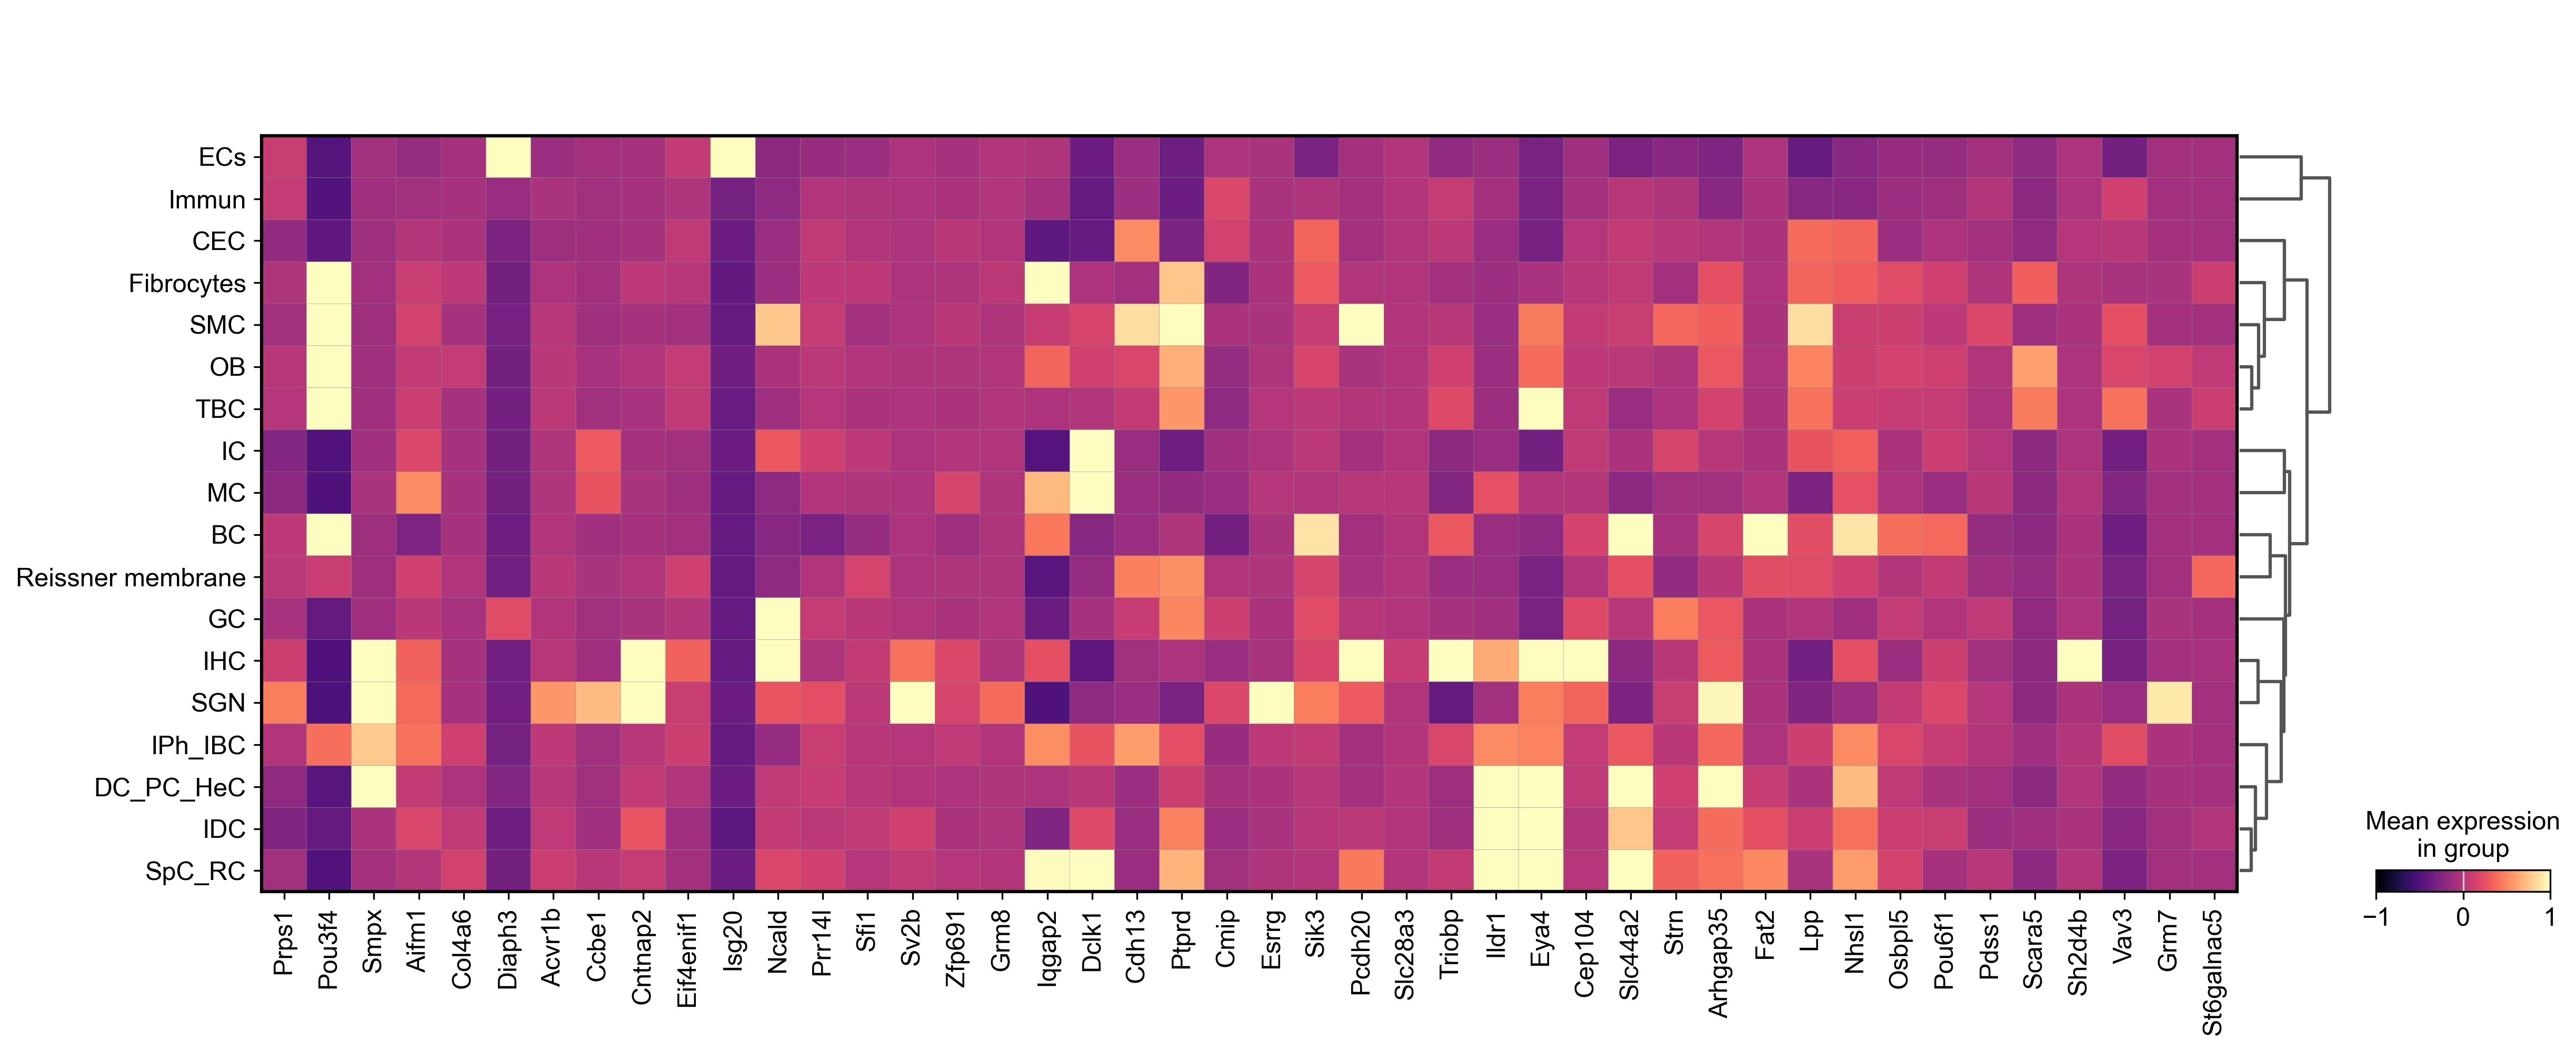

In [103]:
sc.set_figure_params(figsize=(4,4),frameon=False,dpi=150,dpi_save=600)
sc.tl.dendrogram(adata2,groupby='cell_type')
gs = sc.pl.matrixplot(adata2, markers, groupby='subclasses',layer="scaled",dendrogram=True,vmin=-1,cmap="magma",gene_symbols='gene_symbol',
    vmax=1,save="x_link_age_cisplatin_ recessive_mouse_pnas.pdf"
                     )

In [64]:
#genes related syndromic hearing loss
markers = [
'COL4A3','COL4A4','COL4A5','EYA1','SIX5','SIX1','SEMA3E','CHD7','KCNE1',
'NDP','SLC26A4','KCNJ10','HSD17B4','CLPP','LARS2','ERAL1','COL2A1','COL11A1','COL11A2',
'COL9A1','COL9A2','TCOF1','POLR1D','POLR1C','MYO7A','USH1C','CDH23','PCDH15','USH1G',
'USH2A','CLRN1','PAX3','MITF','SNAI2','SOX10','PAX3','EDN3','SOX10','EDNRB','TWNK','WHRN'

          ]#

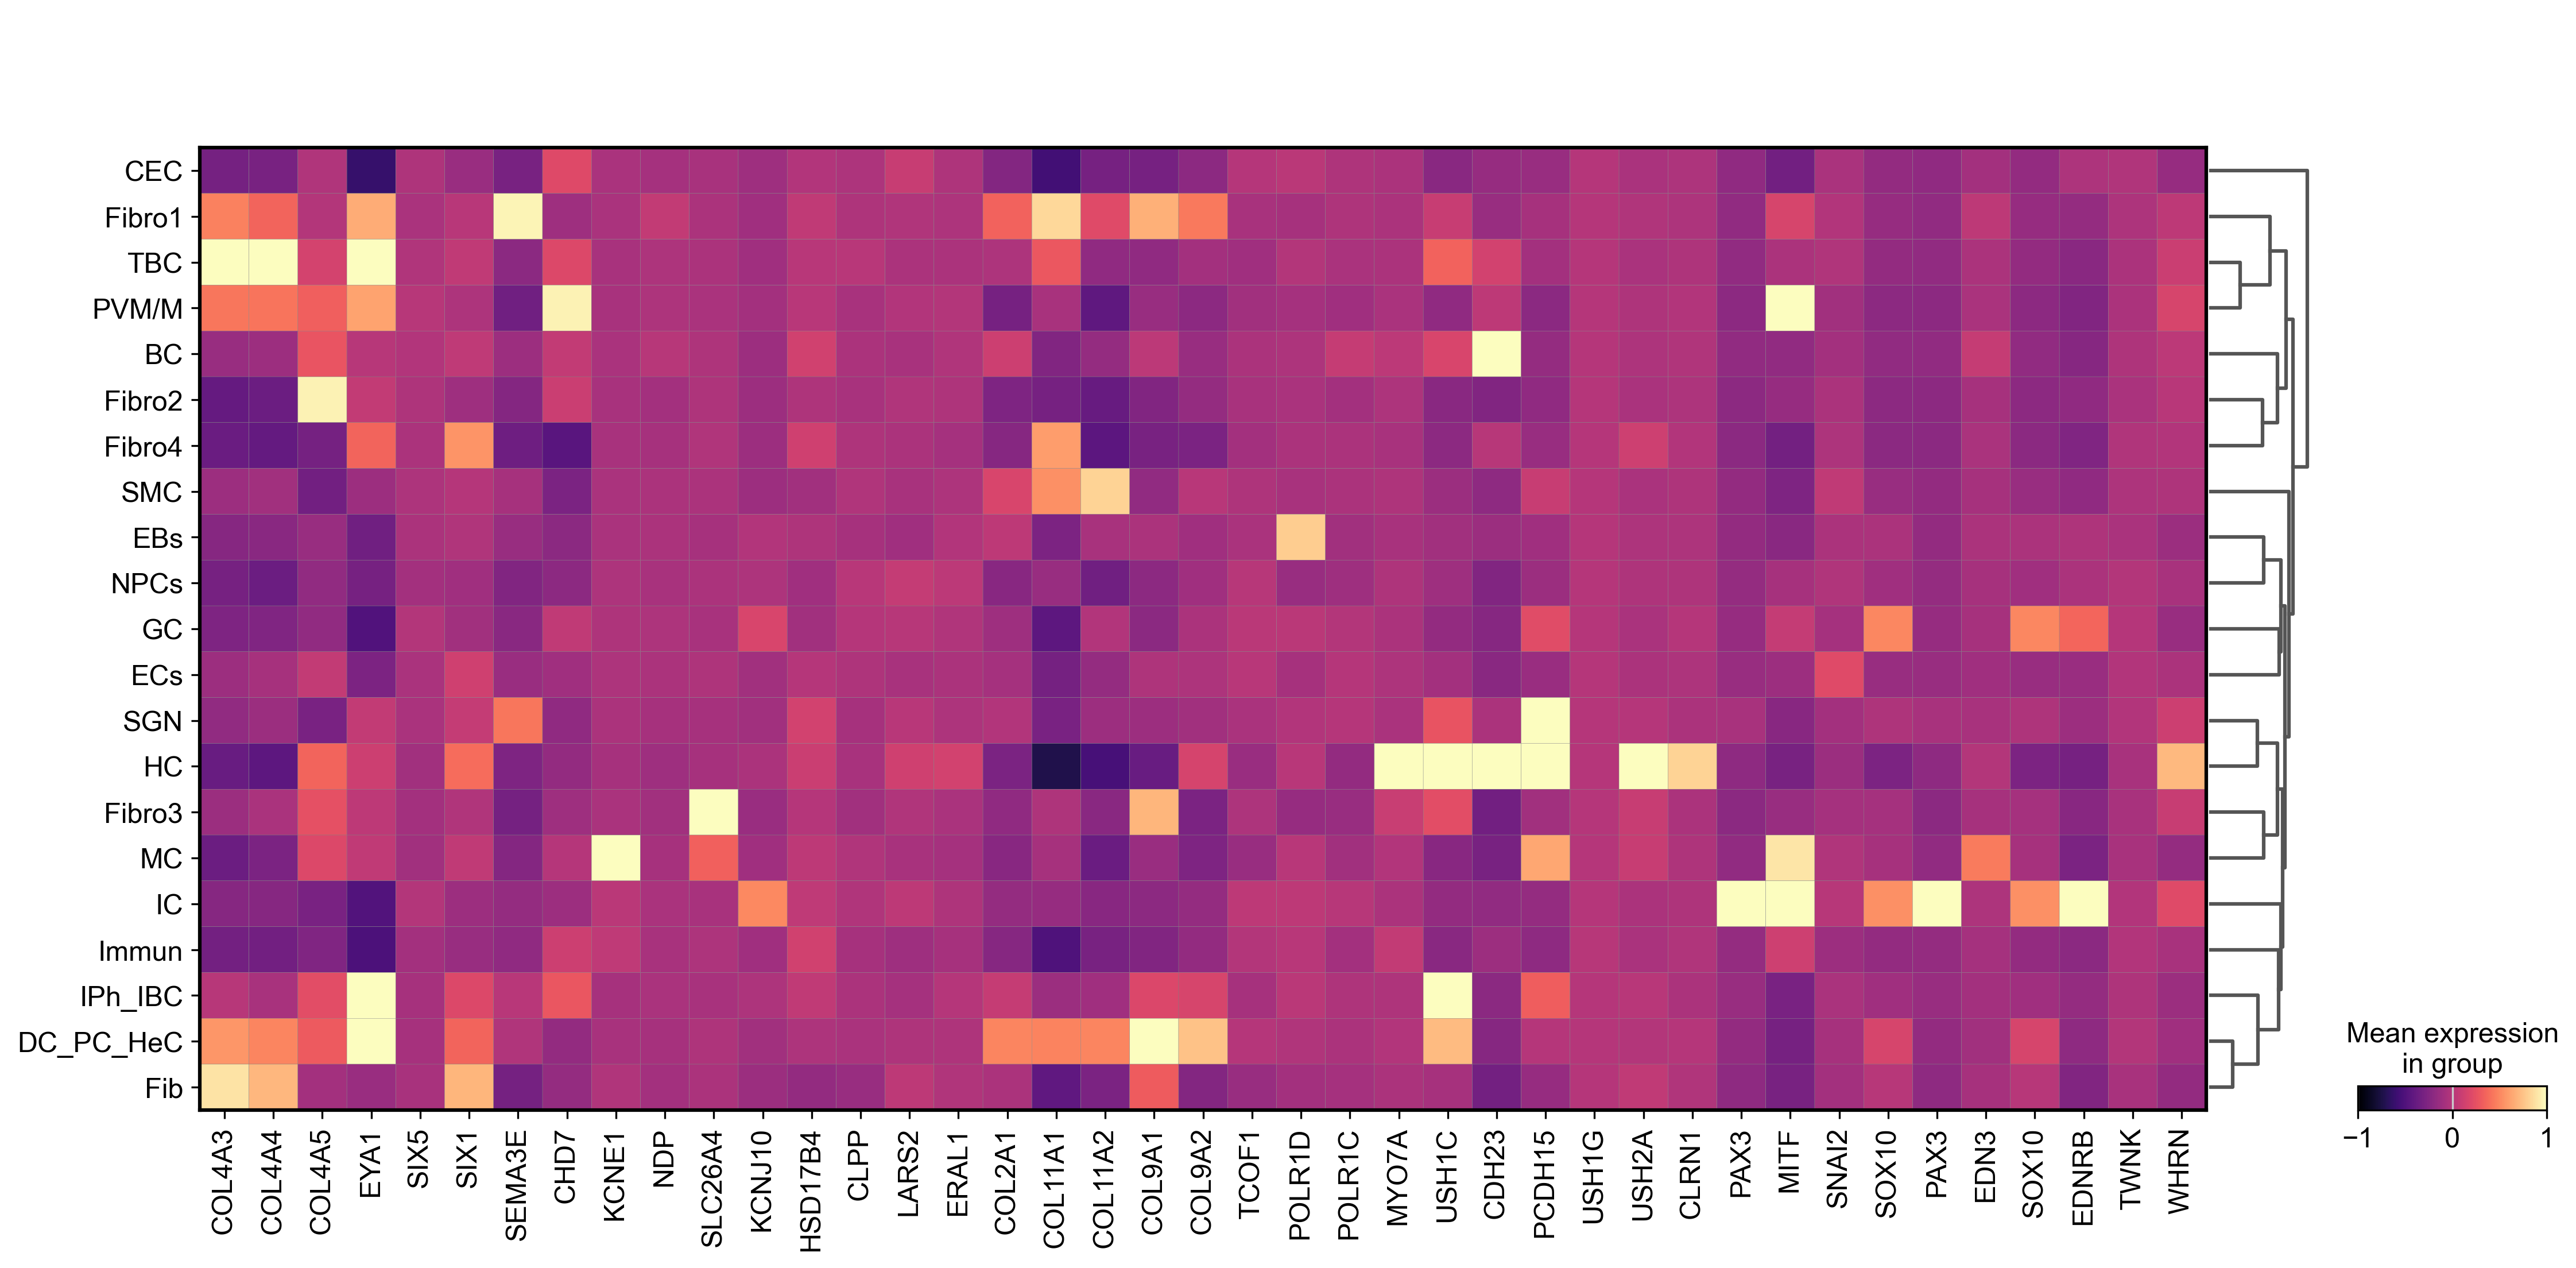

In [65]:
sc.set_figure_params(figsize=(4,4),frameon=False,dpi=150,dpi_save=600)
sc.tl.dendrogram(adata_human2,groupby='subclasses')
gs = sc.pl.matrixplot(adata_human2, markers, groupby='subclasses',layer="scaled",dendrogram=True,vmin=-1,cmap="magma",
    vmax=1,save="syndromic_human.pdf"
                     )

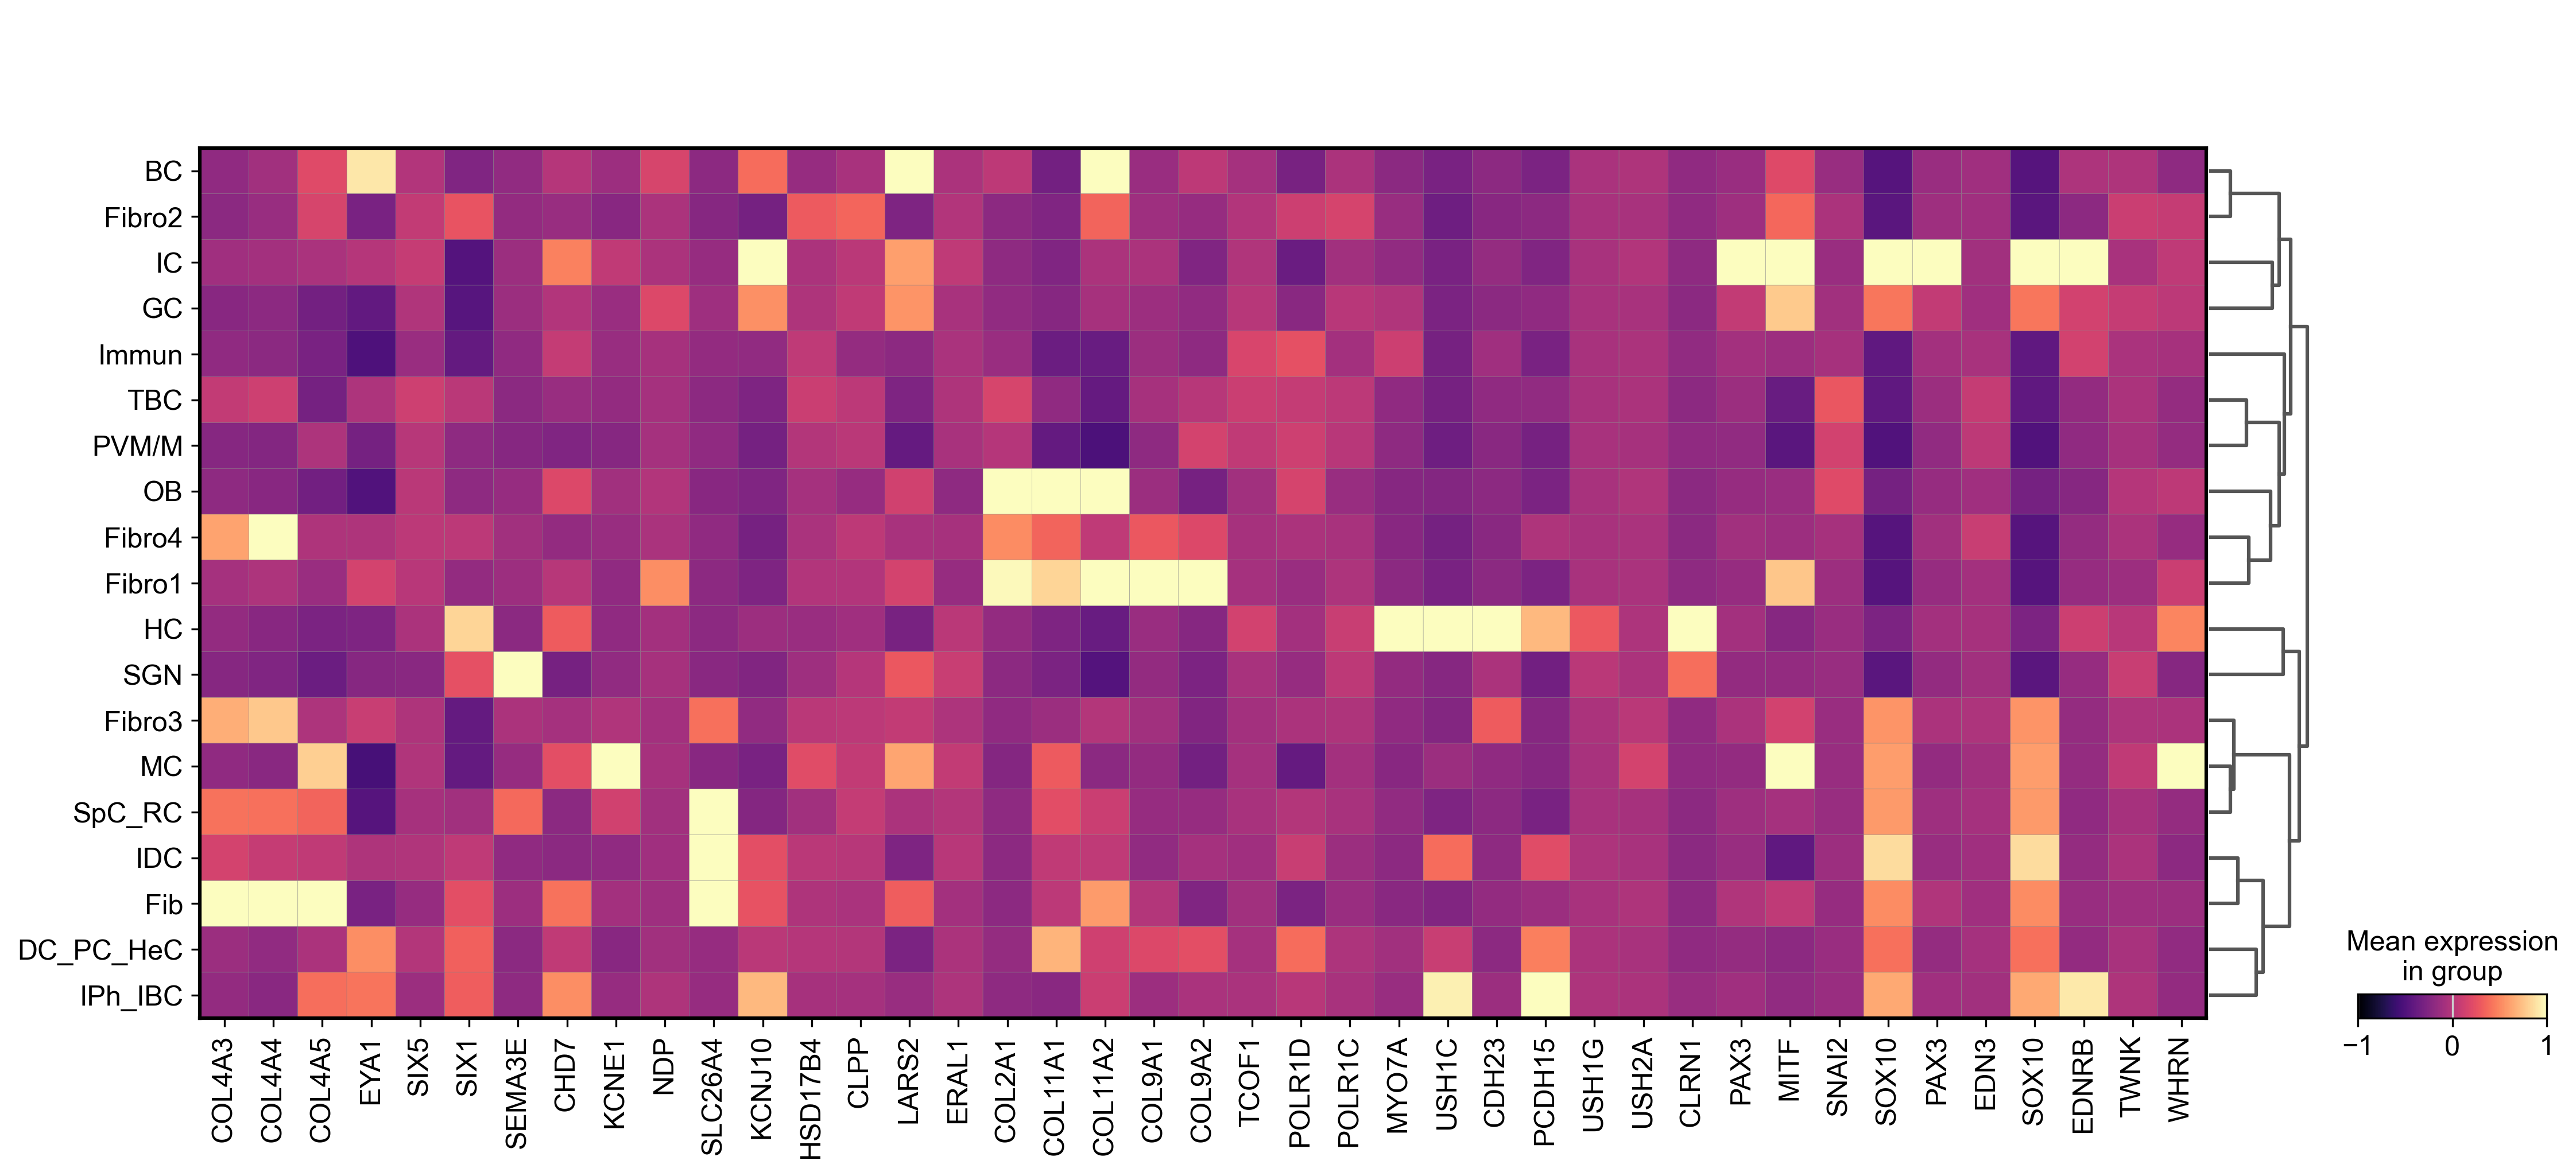

In [66]:
sc.set_figure_params(figsize=(4,4),frameon=False,dpi=150,dpi_save=600)
sc.tl.dendrogram(adata_mouse2,groupby='subclasses')
gs = sc.pl.matrixplot(adata_mouse2, markers, groupby='subclasses',layer="scaled",dendrogram=True,vmin=-1,cmap="magma",
    vmax=1,save="syndromic_mouse.pdf"
                     )

In [104]:
#genes related syndromic hearing loss
markers = [
'Col4a3','Col4a4', 'Col4a5',    'Eya1','Six5','Six1','Sema3e','Chd7','Kcne1',
'Ndp','Slc26a4','Kcnj10','Hsd17b4','Clpp','Lars2','Eral1','Col2a1','Col11a1','Col11a2',
'Col9a1','Col9a2','Tcof1','Polr1d','Polr1c','Myo7a','Ush1c','Cdh23','Pcdh15','Ush1g',
'Ush2a','Clrn1','Pax3','Mitf','Snai2','Sox10','Edn3','Sox10','Ednrb','Twnk','Whrn',

          ]#

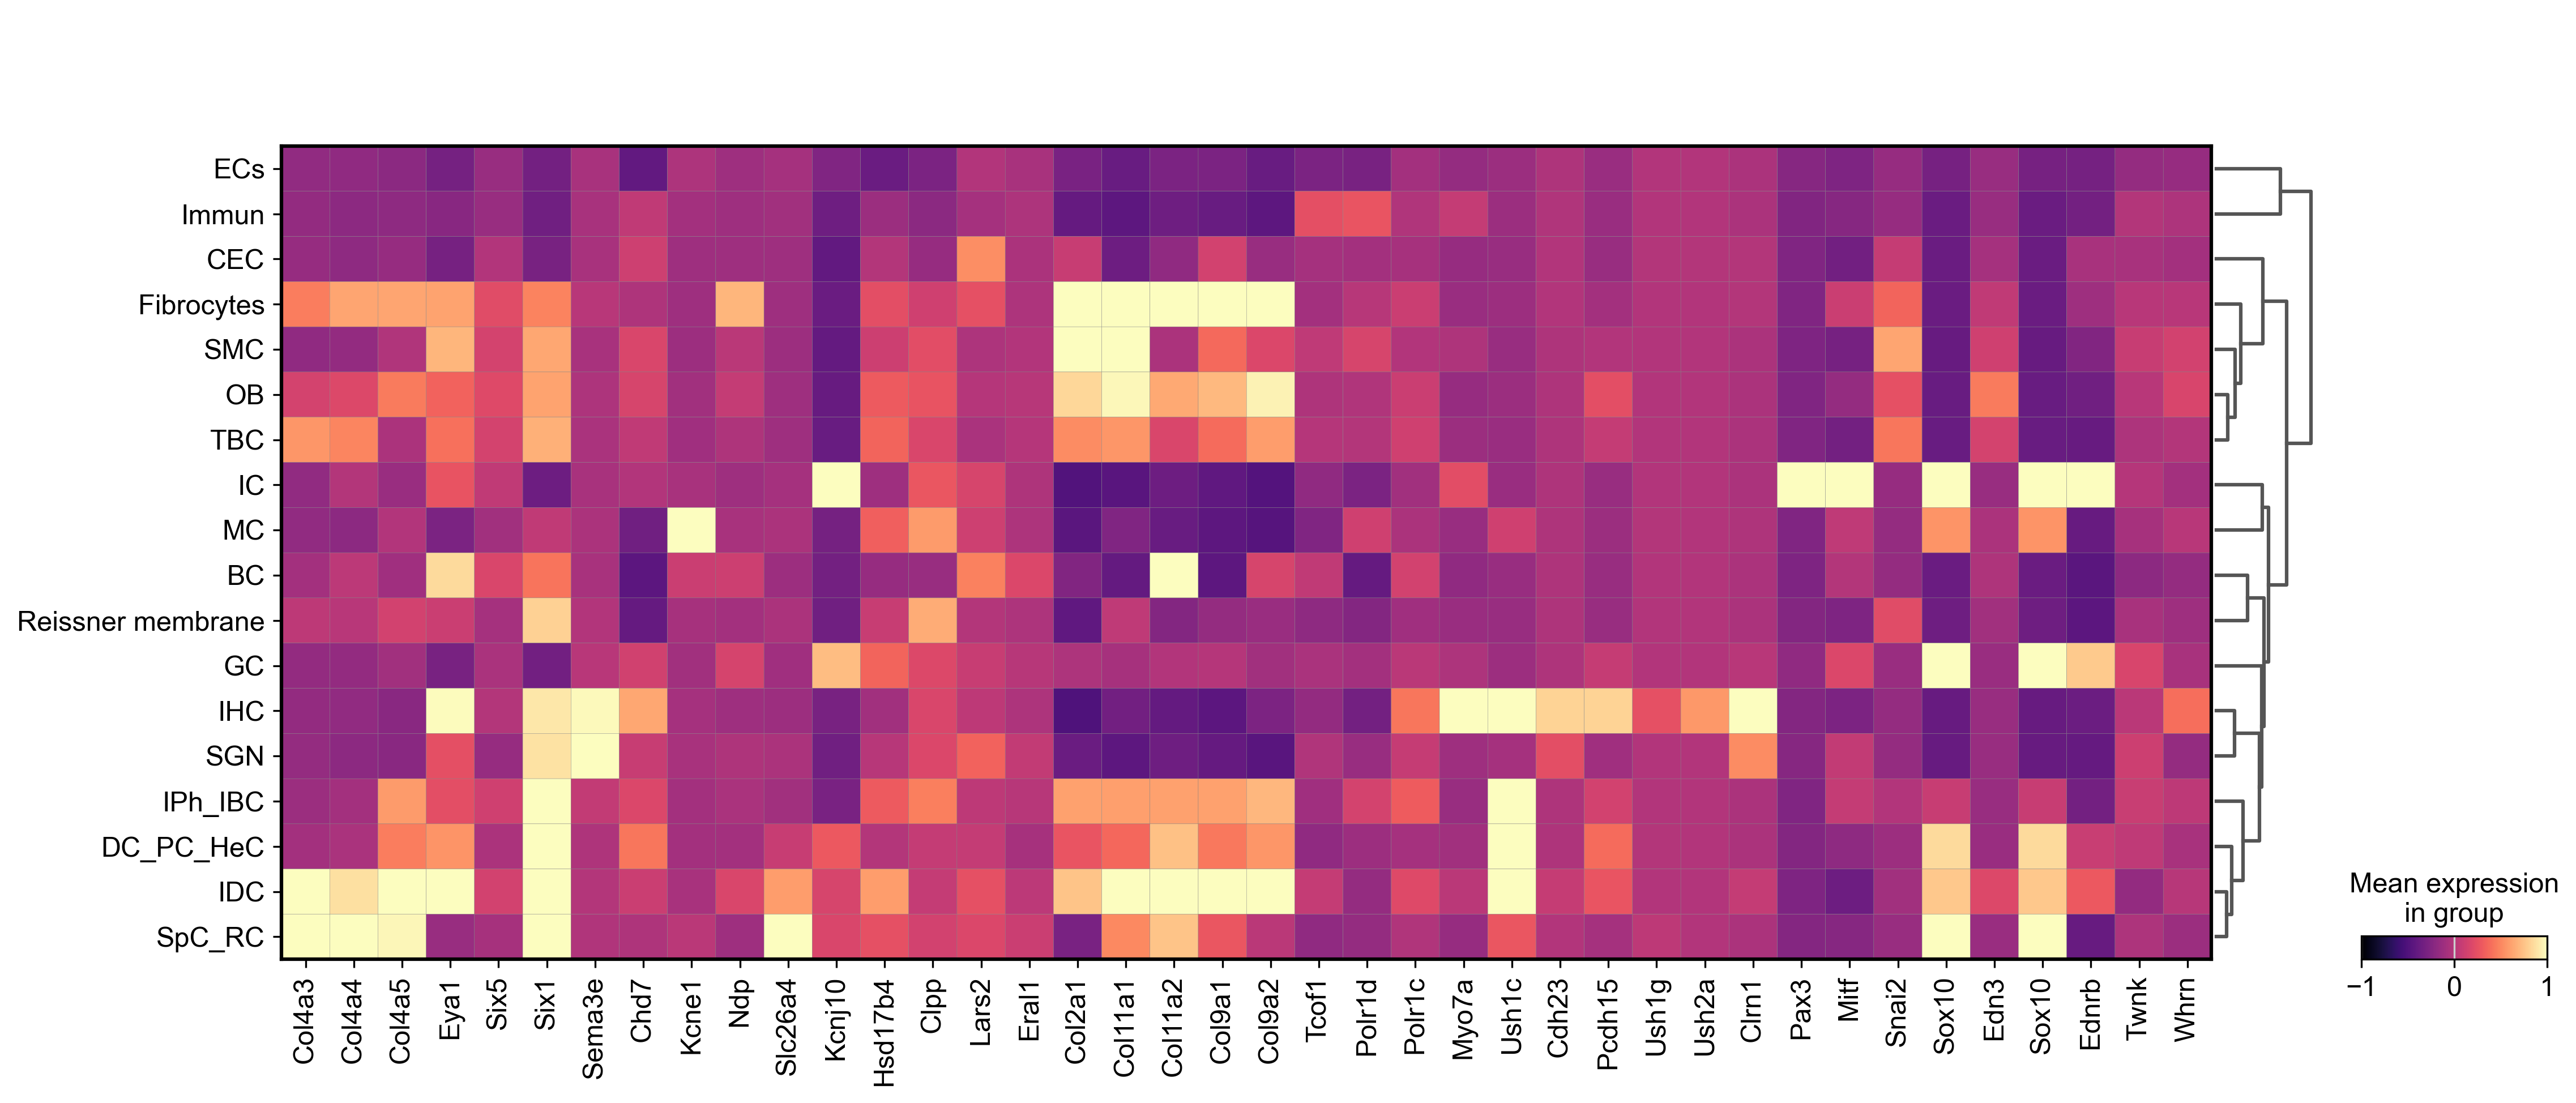

In [105]:
sc.set_figure_params(figsize=(4,4),frameon=False,dpi=150,dpi_save=600)
sc.tl.dendrogram(adata2,groupby='cell_type')
gs = sc.pl.matrixplot(adata2, markers, groupby='subclasses',layer="scaled",dendrogram=True,vmin=-1,cmap="magma",gene_symbols='gene_symbol',
    vmax=1,save="syndromic_mouse_pnas.pdf"
                     )

In [70]:
#genes
markers = [
'COCH','EYA4','COL11A2','COL11A1','TJP2','ACTG1','TRRAP','MYH9','MYO6','GJB6','BDP1',
'PPIP5K2','MSRB3','GAS2','GAB1','ROR1','EYA1','COL4A3','COL11A1','LARS2','MITF','COL4A5',
'CHD7','LPP','NHSL1','PRR14L','ARHGAP35','NCALD','ATP2B2','PTPRQ','CEACAM16','LMX1A','GRHL2',
'DIAPH1','KCNQ4','SIX1','P2RX2','MYO7A','SLC17A8','HOMER2','PLS1','TMC1','MYO3A',
'SLC26A5','PCDH15','MYO15A','MET','CLDN14','SLC22A4','TRIOBP','CDH23',
'GRXCR1','ESRRB','USH2A','PAX3','SEMA3E','KCNE1','CNTNAP2','SMPX','SV2B','CCBE1','FAT2',

'ESPN','RIPOR2','STRC','WHRN',
          ]#'SCD5',

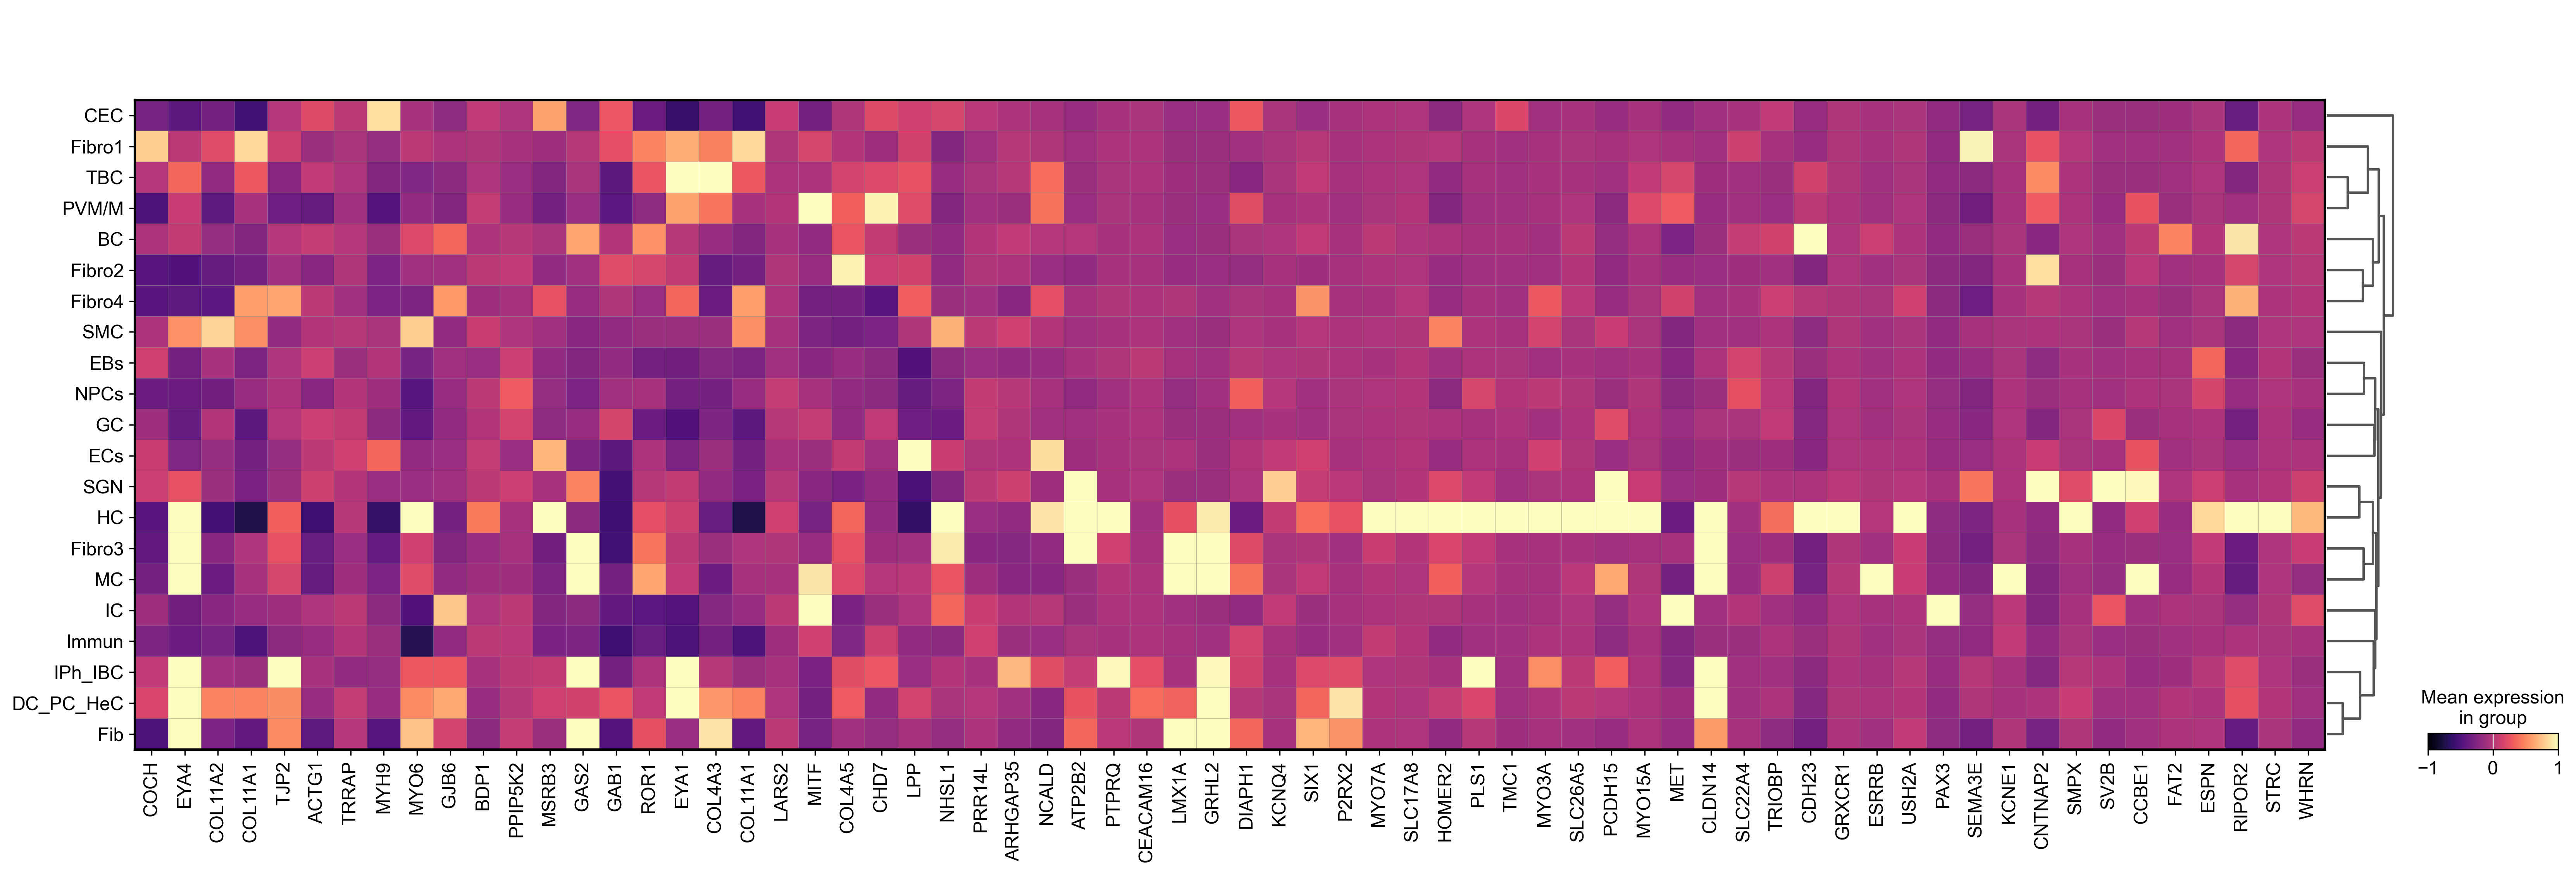

In [71]:
sc.set_figure_params(figsize=(4,4),frameon=False,dpi=150,dpi_save=600)
sc.tl.dendrogram(adata_human2,groupby='subclasses')
gs = sc.pl.matrixplot(adata_human2, markers, groupby='subclasses',layer="scaled",dendrogram=True,vmin=-1,cmap="magma",
    vmax=1,save="selected_human.pdf"
                     )

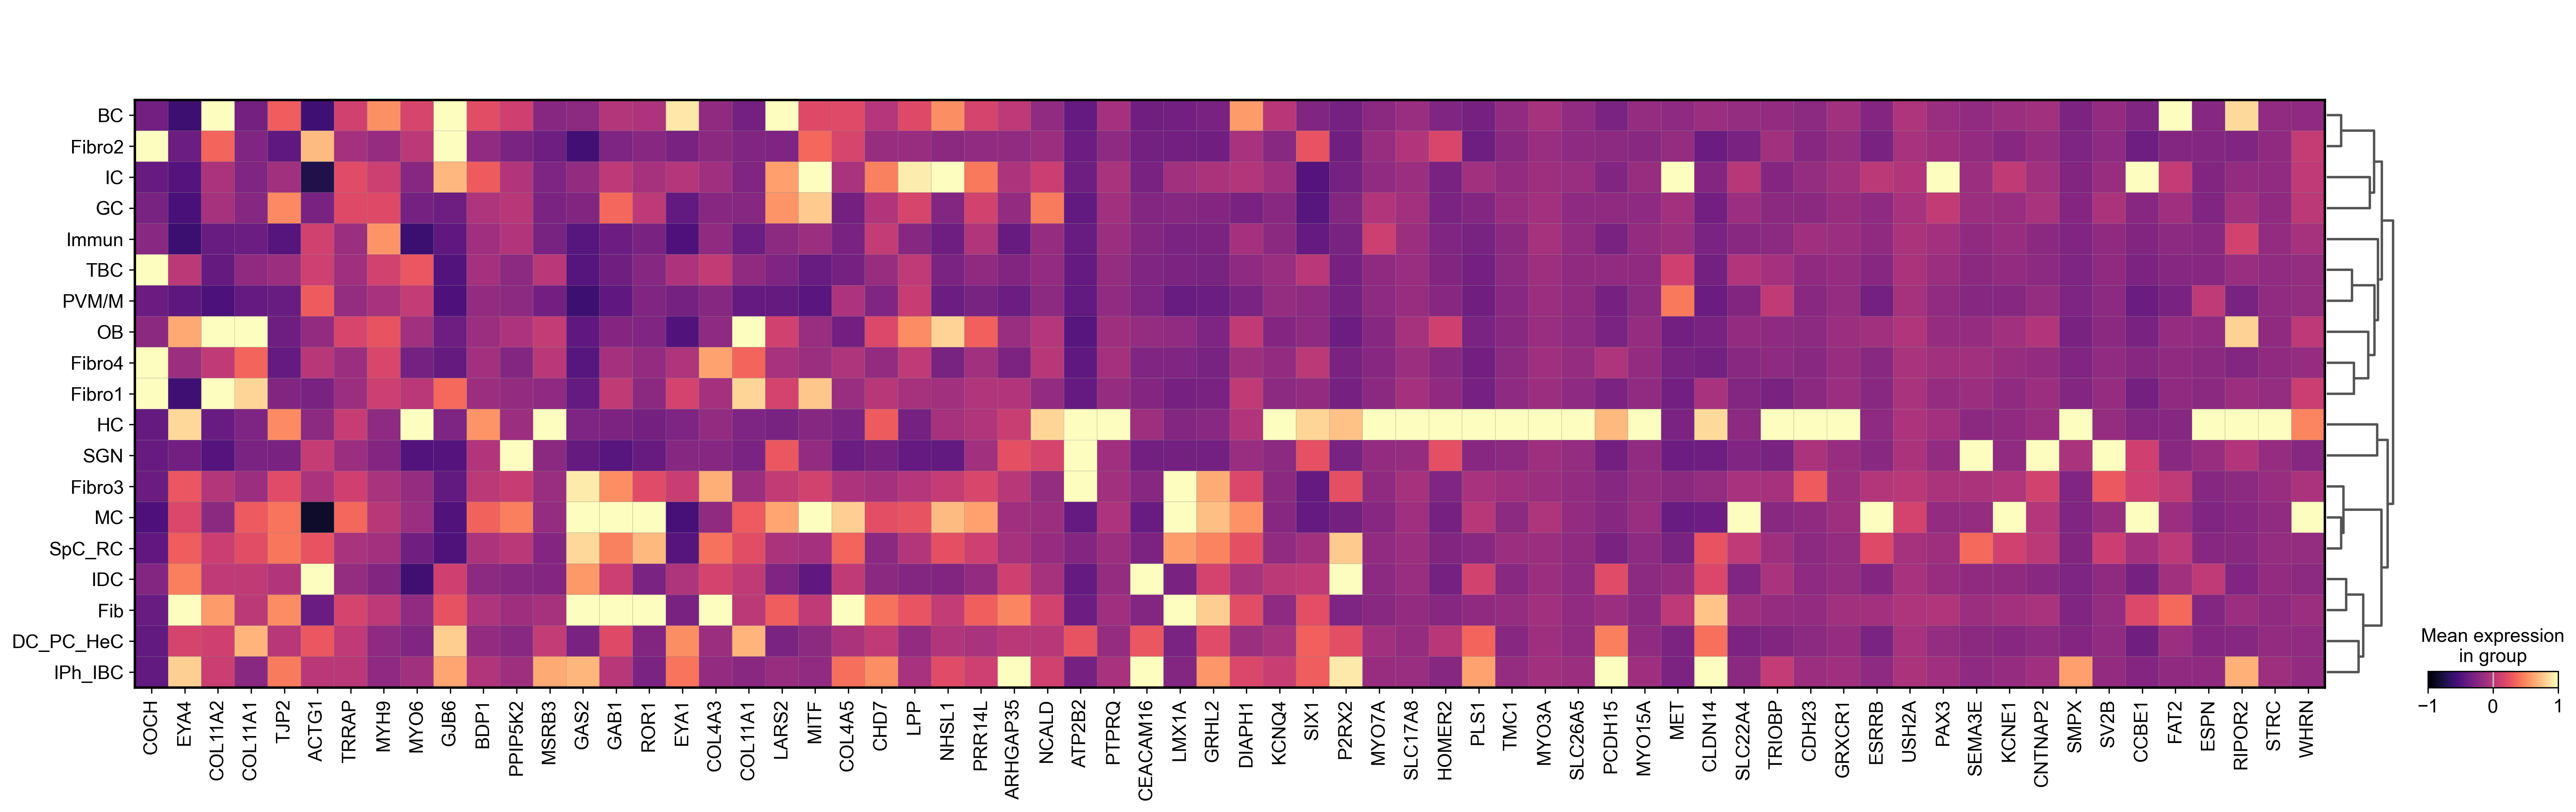

In [72]:
sc.set_figure_params(figsize=(4,4),frameon=False,dpi=150,dpi_save=600)
sc.tl.dendrogram(adata_mouse2,groupby='subclasses')
gs = sc.pl.matrixplot(adata_mouse2, markers, groupby='subclasses',layer="scaled",dendrogram=True,vmin=-1,cmap="magma",
    vmax=1,save="selected_mouse.pdf"
                     )